<html>
    <div style="padding: 50px; background-color: lightskyblue; text-align: center; color: #000;">
        <h1>CAB420 Workshop - Week 7 Practical</h1>
        <h2>Eigenfaces</h2>
    </div>
</html>

## Problem 1 - Eigenfaces
Consider the EigenFaces lecture example (CAB420_Dimension_Reduction_Example_5_Eigenfaces.ipynb). Using this example and the PCA space that is learned on the YaleB Face Dataset, investigate the face recognition performance of two additional datasets: Yale_32x32.mat and ORL_32x32.mat. For each of these you should:
1. Use the PCA Space learned on the YaleB data (i.e. don't learn a different PCA space on the new data);

2. Ensure that the new data is resized to the same size as the YaleB data prior to use;

3. Train a simple KNN classifier (or another classifier of your choosing), using roughly 66% of the data as training, and the rest as testing;
4. Evaluate the accuracy of the predictions with different numbers of components retained;
5. Visually inspect reconstructions with different numbers of components retained, and comment on the quality of the reconstructions for the two databases.

In [77]:
# Importing the necessary libraries
import numpy as np
import numpy.matlib
import scipy
import matplotlib.pyplot as plt

from sklearn import decomposition, discriminant_analysis, datasets
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

### Step 1: Preprocessing

In [78]:
# Loading in the datasets
yale_b = scipy.io.loadmat('data/YaleB_32x32.mat')
features = yale_b['fea'] / 255
gnd = np.array(yale_b['gnd'])
print(np.shape(features))

orl = scipy.io.loadmat('data/ORL_32x32.mat')
features_orl = orl['fea'] / 255
gnd_orl = np.array(orl['gnd'])
print(np.shape(features_orl))

(2414, 1024)
(400, 1024)


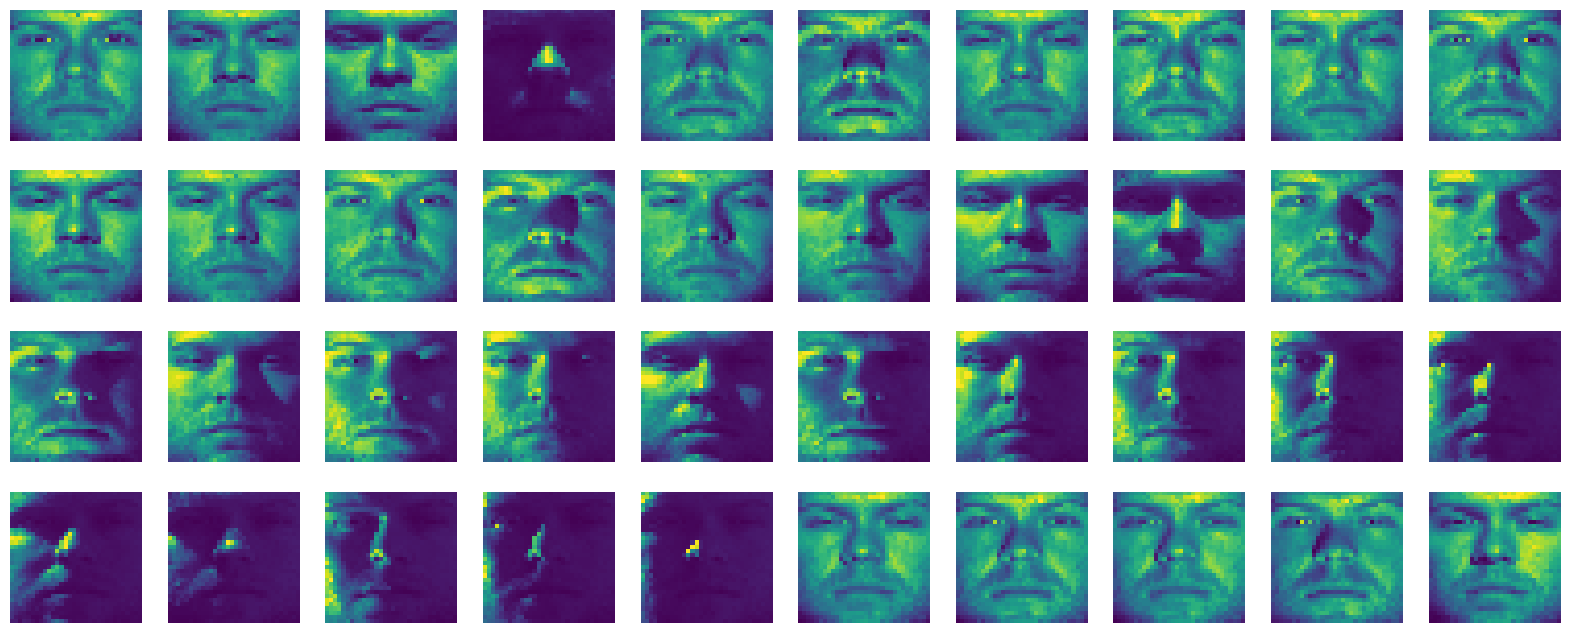

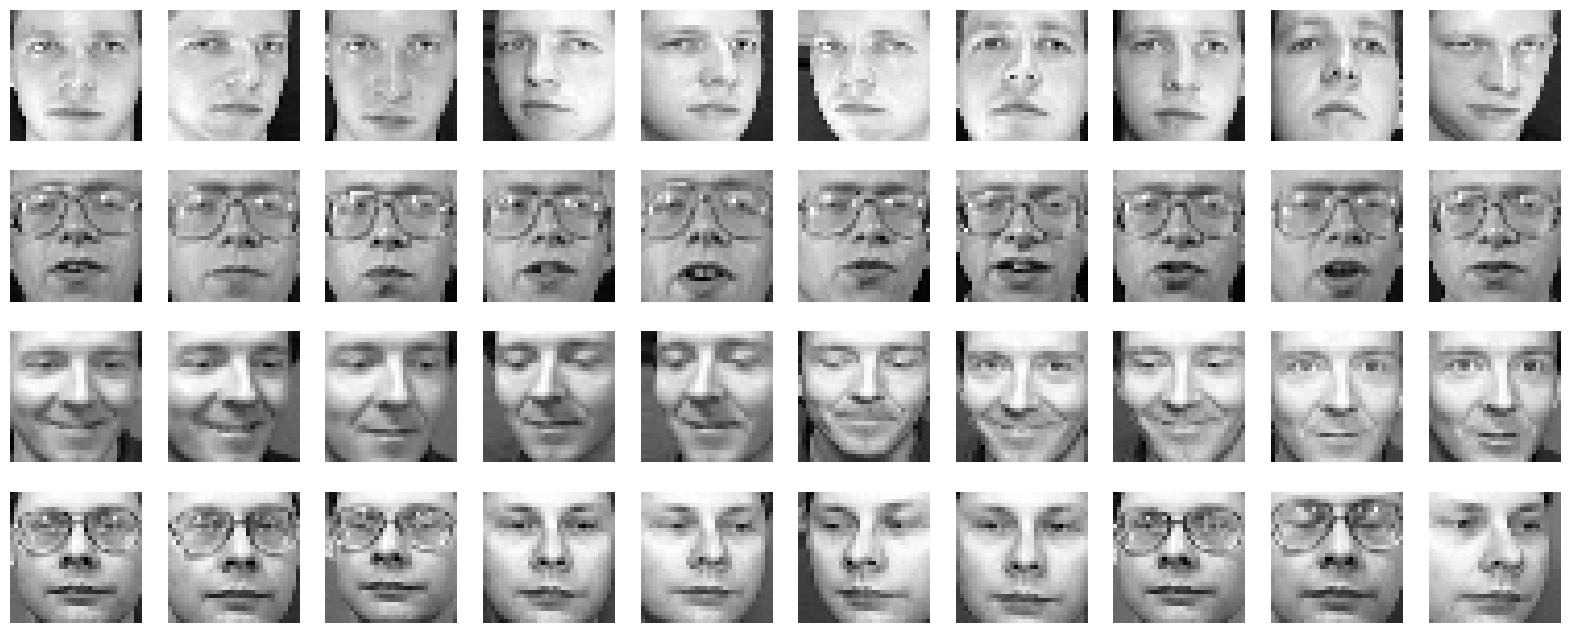

In [81]:
# Reshaping the features into images 
face_width = 32
face_height = 32

feature_reshape = np.reshape(features.transpose(), (face_width, face_height, 1, len(features)))

# Displaying the images to confirm it worked
figure = plt.figure(figsize=[20, 8])

for i in range(40):
    ax = figure.add_subplot(4, 10, i + 1)
    ax.imshow(feature_reshape[:, :, 0, i].transpose())
    ax.axis('off')

feature_orl_reshape = np.reshape(features_orl.transpose(), (face_width, face_height, 1, len(features_orl)))

# Displaying the images to confirm it worked for ORL
figure_orl = plt.figure(figsize=[20, 8])
for i in range(40):
    ax = figure_orl.add_subplot(4, 10, i + 1)
    ax.imshow(feature_orl_reshape[:, :, 0, i].transpose(), cmap=plt.get_cmap('gray'))
    ax.axis('off')

In [82]:
# Setting up a training and testing set
np.random.seed(4)
test_frames = np.array(()).astype('int')

for i in np.unique(gnd):
    indexes = np.where(gnd == i)[0]
    count = len(indexes)
    f = np.random.randint(count, size = 6)
    test_frames = np.append(test_frames, indexes[f])

train_features = features
train_gnd = gnd

train_features = np.delete(train_features, test_frames, axis=0)
train_gnd = np.delete(train_gnd, test_frames, axis=0)

test_features = features[test_frames, :]
test_gnd = gnd[test_frames, :]

print(np.shape(train_features))
print(np.shape(test_features))

# ORL Dataset
np.random.seed(4)
test_frames_orl = np.array(()).astype('int')

for i in np.unique(gnd_orl):
    indexes = np.where(gnd_orl == i)[0]
    count = len(indexes)
    f = np.random.randint(count, size = 6)
    test_frames_orl = np.append(test_frames_orl, indexes[f])

train_features_orl = features_orl
train_gnd_orl = gnd_orl

print(train_features_orl.shape)
print(test_frames_orl.shape)

train_features_orl = np.delete(train_features_orl, test_frames_orl, axis=0)
train_gnd_orl = np.delete(train_gnd_orl, test_frames_orl, axis=0)

test_features_orl = features_orl[test_frames_orl, :]
test_gnd_orl = gnd_orl[test_frames_orl, :]

print(np.shape(train_features_orl))
print(np.shape(test_features_orl))

(2196, 1024)
(228, 1024)
(400, 1024)
(240,)
(208, 1024)
(240, 1024)


### Step 2: PCA

Computing the PCA space

Text(0.5, 1.0, 'A Very Average Face (ORL)')

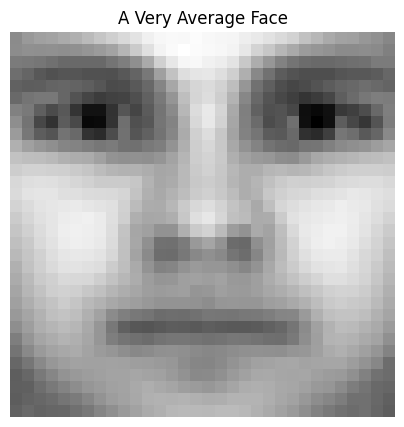

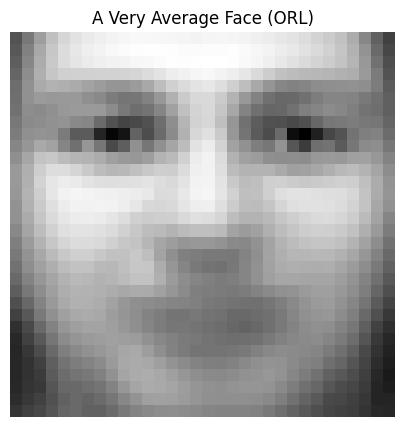

In [83]:
mean_face = np.reshape(np.mean(train_features, axis = 0), (-1, 1))
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1)
mean_face_image = np.reshape(mean_face, (32,32))
ax.imshow(mean_face_image.transpose(), cmap = plt.get_cmap('gray'))
ax.axis('off')
ax.set_title('A Very Average Face')

mean_face_orl = np.reshape(np.mean(train_features_orl, axis = 0), (-1, 1))
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1)
mean_face_image_orl = np.reshape(mean_face_orl, (32,32))
ax.imshow(mean_face_image_orl.transpose(), cmap = plt.get_cmap('gray'))
ax.axis('off')
ax.set_title('A Very Average Face (ORL)')


In [84]:
pca = decomposition.PCA()
pca.fit(train_features)
transformed_data = pca.transform(train_features)

pca_orl = decomposition.PCA()
pca_orl.fit(train_features_orl)
transformed_data_orl = pca_orl.transform(train_features_orl)

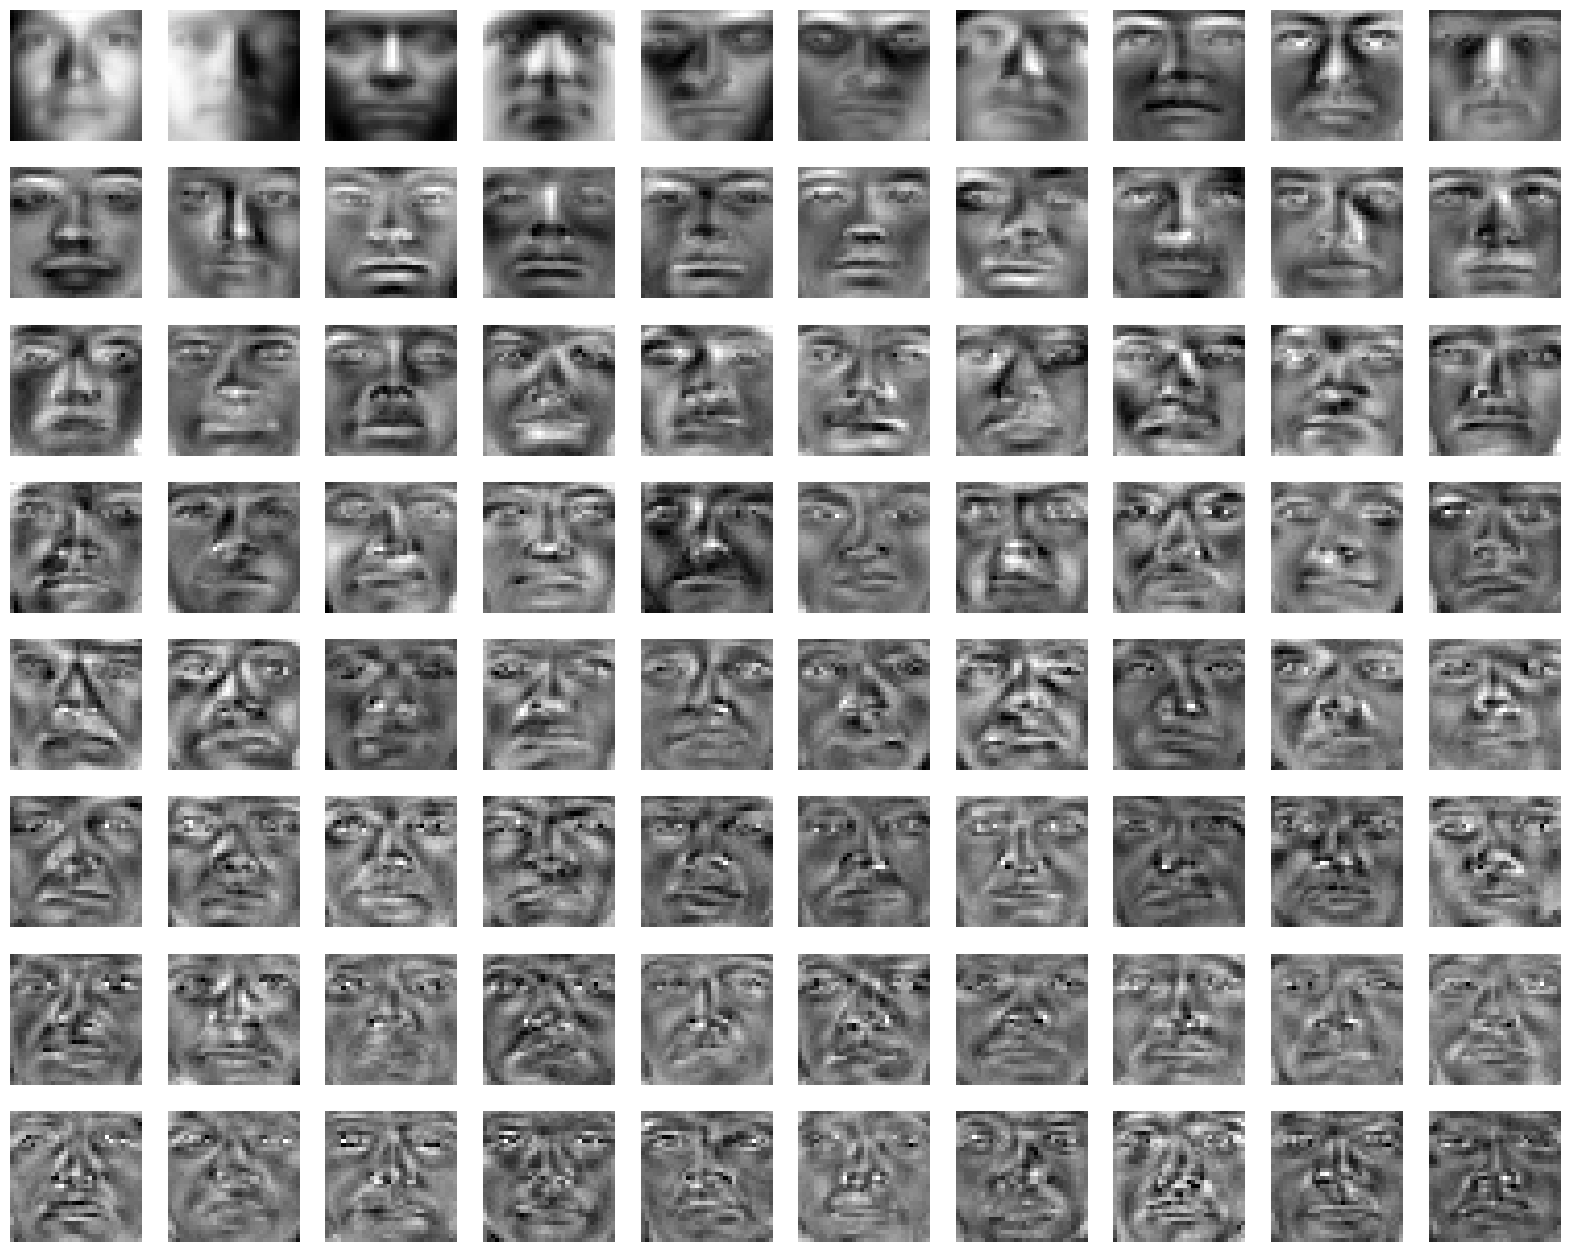

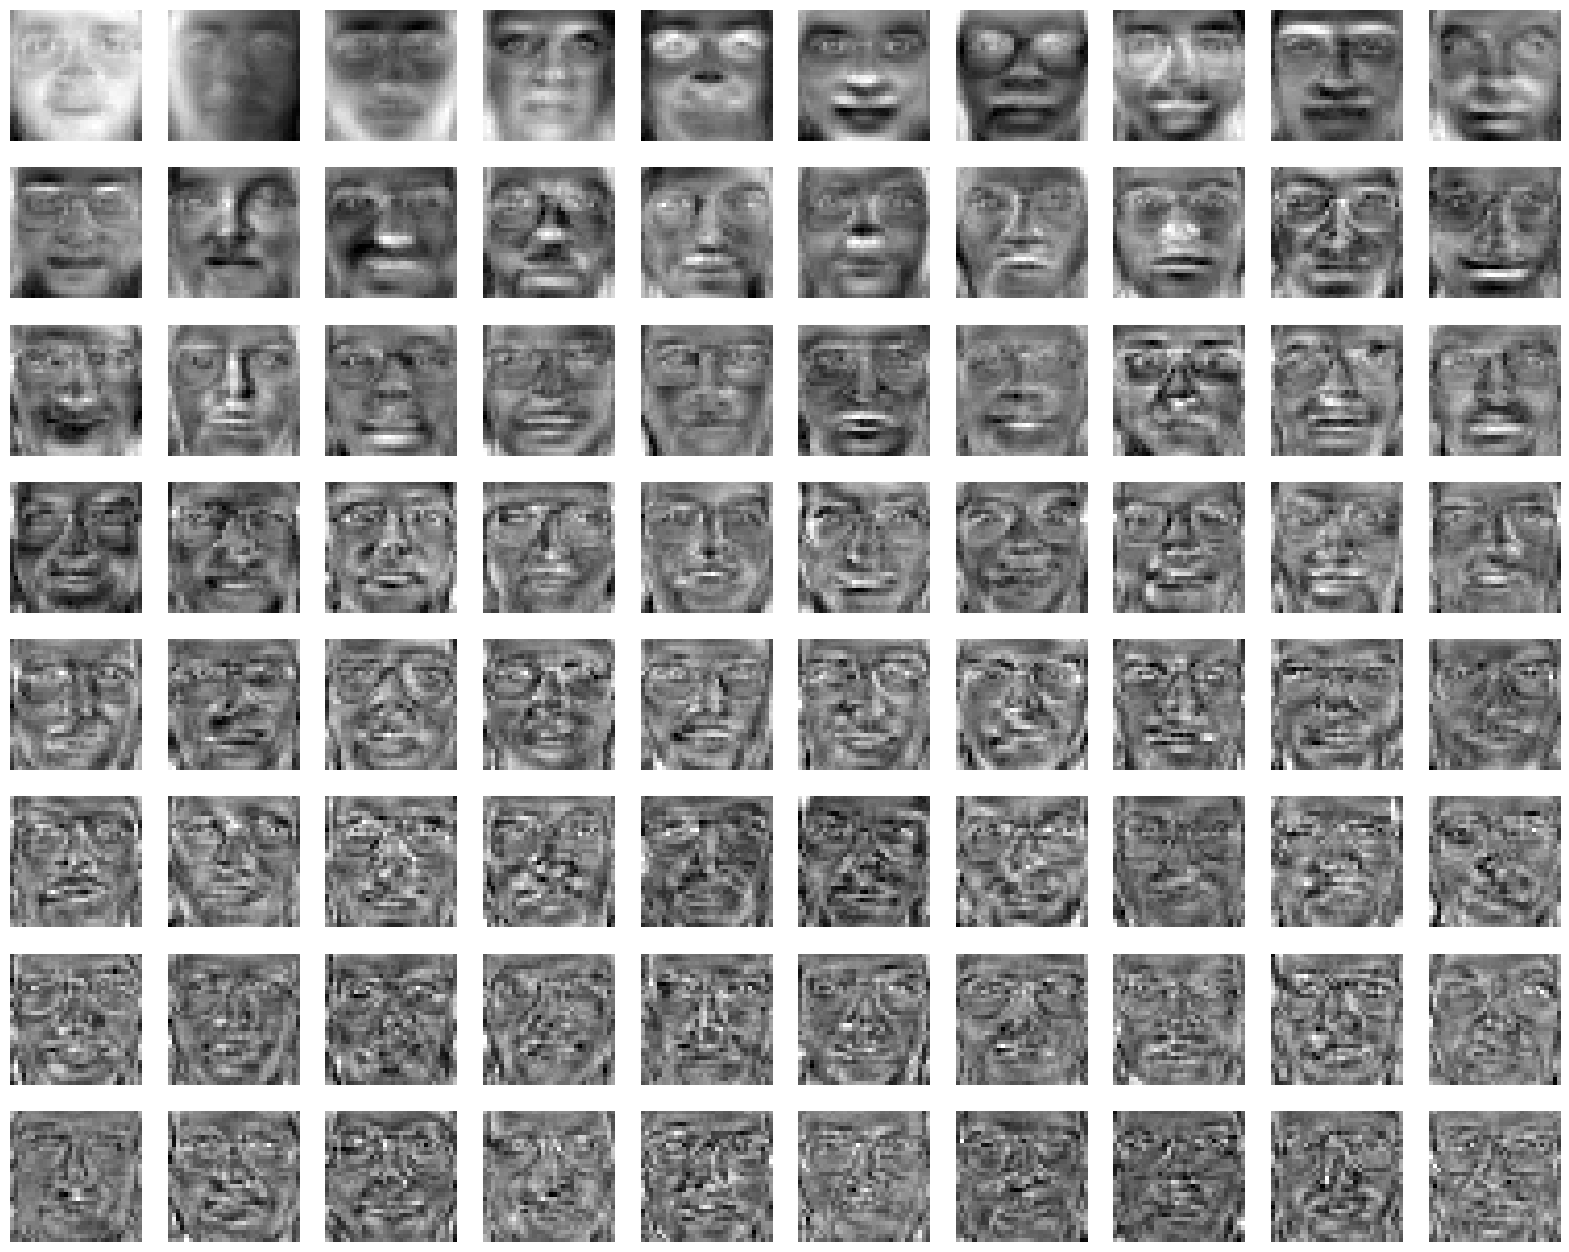

In [85]:
# Retrieving the principal components
fig = plt.figure(figsize=[20, 16])

for i in range(80):
    ax = fig.add_subplot(8, 10, i + 1)
    pc = np.reshape(pca.components_[i, :], (32, 32))
    ax.imshow(pc.transpose(), cmap=plt.get_cmap('gray'))
    ax.axis('off')

# ORL 
fig_orl = plt.figure(figsize=[20, 16])
for i in range(80):
    ax = fig_orl.add_subplot(8, 10, i + 1)
    pc_orl = np.reshape(pca_orl.components_[i, :], (32, 32))
    ax.imshow(pc_orl.transpose(), cmap=plt.get_cmap('gray'))
    ax.axis('off')

Text(0.5, 0, 'Number of Components')

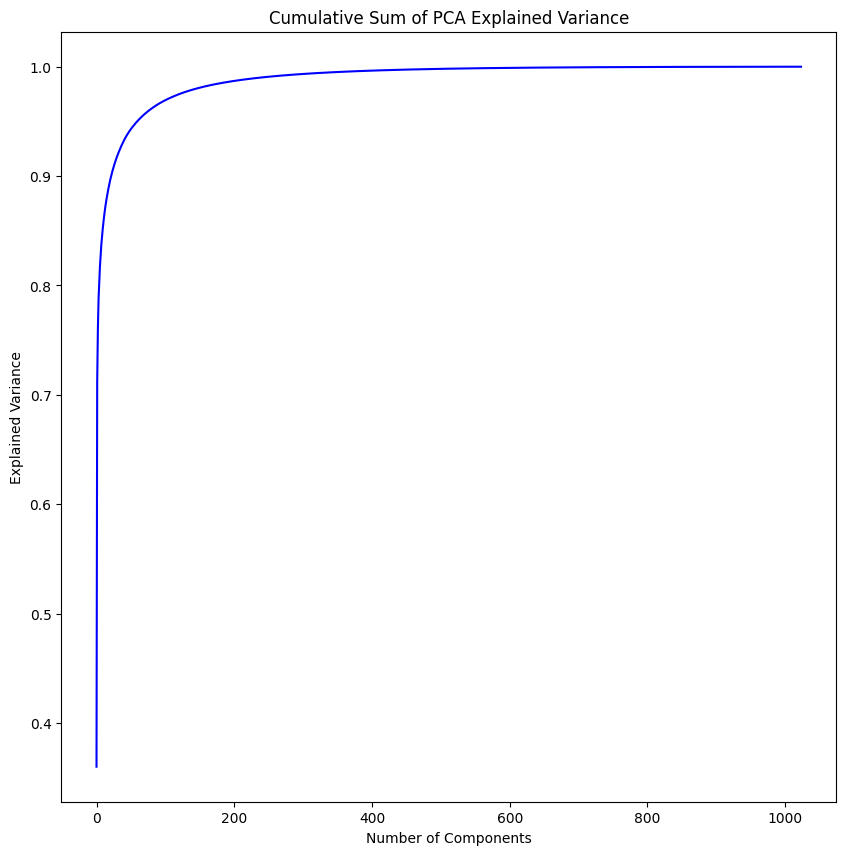

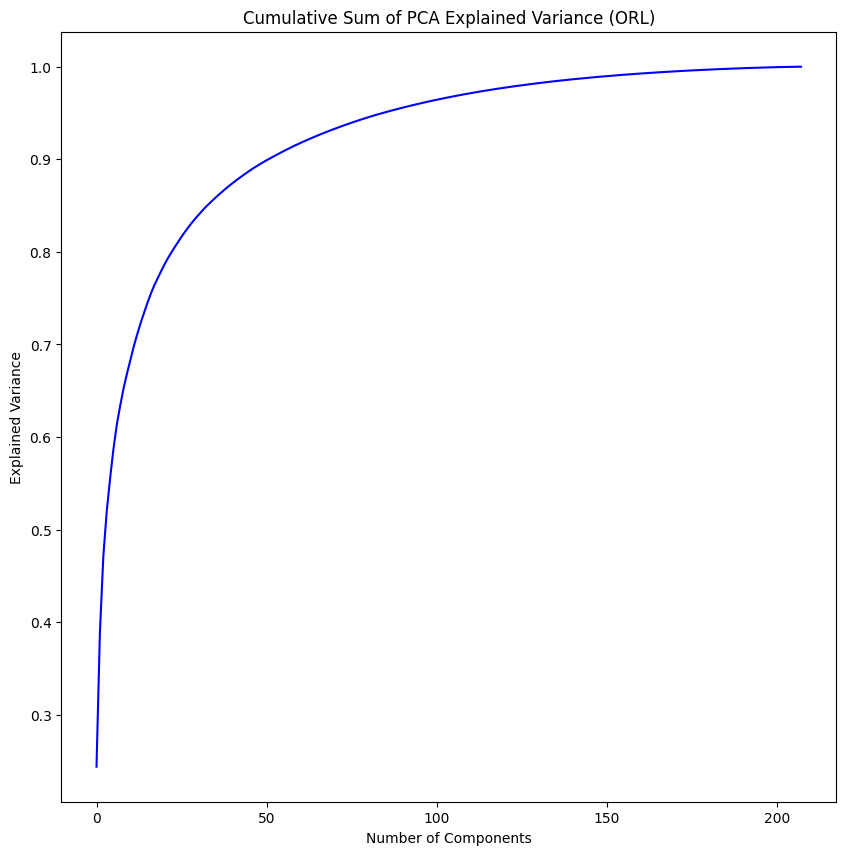

In [86]:
# Checking the Cumulative Explained Variance Ratio

cumulative_sum = np.cumsum(pca.explained_variance_ratio_, axis = 0)
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.plot(cumulative_sum, color = 'blue')
ax.set_title('Cumulative Sum of PCA Explained Variance')
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Number of Components')

# ORL
cumulative_sum_orl = np.cumsum(pca_orl.explained_variance_ratio_, axis = 0)
fig_orl = plt.figure(figsize=[10, 10])
ax_orl = fig_orl.add_subplot(1, 1, 1)
ax_orl.plot(cumulative_sum_orl, color = 'blue')
ax_orl.set_title('Cumulative Sum of PCA Explained Variance (ORL)')
ax_orl.set_ylabel('Explained Variance')
ax_orl.set_xlabel('Number of Components')

In [87]:
# Finding how much variance is explained in the data

top_90 = np.where(cumulative_sum > 0.9)[0][0]
print(f'90% in {top_90 + 1} components')
top_95 = np.where(cumulative_sum > 0.95)[0][0]
print(f'95% in {top_95 + 1} components')
top_99 = np.where(cumulative_sum > 0.99)[0][0]
print(f'99% in {top_99 + 1} components')

print('ORL Dataset:')
# ORL
top_90_orl = np.where(cumulative_sum_orl > 0.9)[0][0]
print(f'90% in {top_90_orl + 1} components')
top_95_orl = np.where(cumulative_sum_orl > 0.95)[0][0]
print(f'95% in {top_95_orl + 1} components')
top_99_orl = np.where(cumulative_sum_orl > 0.99)[0][0]
print(f'99% in {top_99_orl + 1} components')


90% in 23 components
95% in 61 components
99% in 238 components
ORL Dataset:
90% in 52 components
95% in 86 components
99% in 152 components


Text(0.5, 1.0, 'Full Reconstruction')

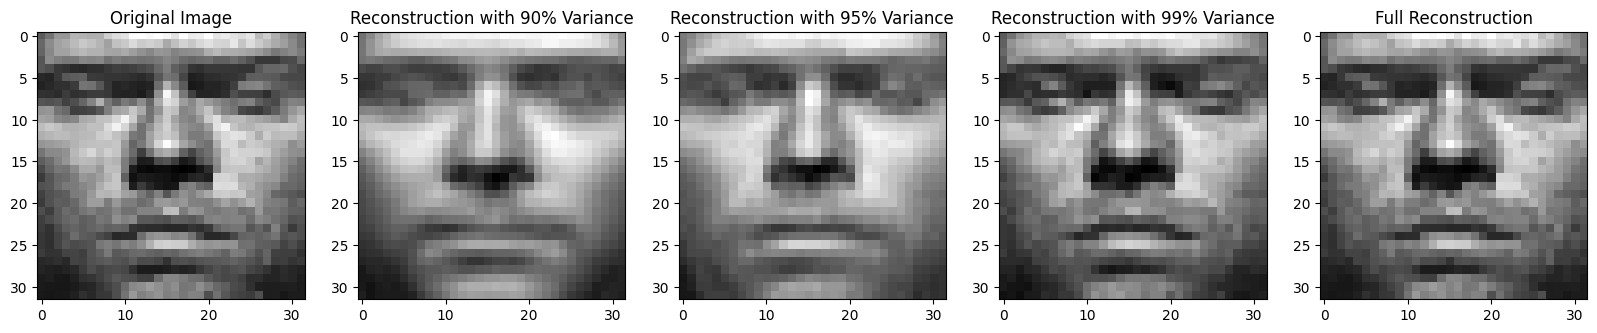

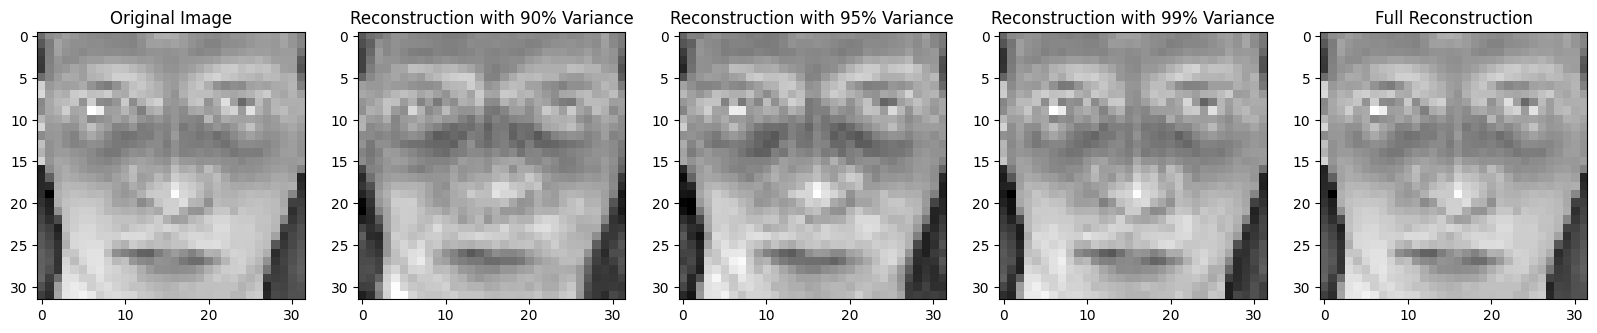

In [88]:
# Analysing some of the reconstructions 
face_id = 1
fig = plt.figure(figsize=[20, 5])

ax = fig.add_subplot(1, 5, 1)
ax.imshow(np.reshape(train_features[face_id, :] - pca.mean_, (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax.set_title('Original Image')

ax = fig.add_subplot(1, 5, 2)
ax.imshow(np.reshape(pca.components_[0: top_90, :].transpose().dot(np.reshape(transformed_data[face_id, 0: top_90], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax.set_title('Reconstruction with 90% Variance')

ax = fig.add_subplot(1, 5, 3)
ax.imshow(np.reshape(pca.components_[0: top_95, :].transpose().dot(np.reshape(transformed_data[face_id, 0:top_95], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax.set_title('Reconstruction with 95% Variance')

ax = fig.add_subplot(1, 5, 4)
ax.imshow(np.reshape(pca.components_[0: top_99, :].transpose().dot(np.reshape(transformed_data[face_id, 0:top_99], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax.set_title('Reconstruction with 99% Variance')

ax = fig.add_subplot(1, 5, 5)
ax.imshow(np.reshape(pca.components_[:, :].transpose().dot(np.reshape(transformed_data[face_id, :], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax.set_title('Full Reconstruction')

# ORL 
face_id_orl = 1
fig_orl = plt.figure(figsize=[20, 5])
ax_orl = fig_orl.add_subplot(1, 5, 1)
ax_orl.imshow(np.reshape(train_features_orl[face_id_orl, :] - pca_orl.mean_, (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax_orl.set_title('Original Image')

ax_orl = fig_orl.add_subplot(1, 5, 2)
ax_orl.imshow(np.reshape(pca_orl.components_[0: top_90_orl, :].transpose().dot(np.reshape(transformed_data_orl[face_id_orl, 0: top_90_orl], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax_orl.set_title('Reconstruction with 90% Variance')
ax_orl = fig_orl.add_subplot(1, 5, 3)
ax_orl.imshow(np.reshape(pca_orl.components_[0: top_95_orl, :].transpose().dot(np.reshape(transformed_data_orl[face_id_orl, 0:top_95_orl], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax_orl.set_title('Reconstruction with 95% Variance')

ax_orl = fig_orl.add_subplot(1, 5, 4)
ax_orl.imshow(np.reshape(pca_orl.components_[0: top_99_orl, :].transpose().dot(np.reshape(transformed_data_orl[face_id_orl, 0:top_99_orl], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax_orl.set_title('Reconstruction with 99% Variance')

ax_orl = fig_orl.add_subplot(1, 5, 5)
ax_orl.imshow(np.reshape(pca_orl.components_[:, :].transpose().dot(np.reshape(transformed_data_orl[face_id_orl, :], (-1, 1))), (32, 32)).transpose(), cmap=plt.get_cmap('gray'))
ax_orl.set_title('Full Reconstruction')

### Operating in the Dimension Reduced Space

In [89]:
# Transforming the training data
transformed_train_90 = transformed_data[:, 0:top_90]

# Transforming the test data
transformed_test = pca.transform(test_features)
transformed_test_90 = transformed_test[:, 0:top_90]

# For First Test Face, find closest face in the training set
distance = np.sqrt(np.sum((transformed_train_90 - transformed_test_90[0, :]) ** 2, axis = 1))

# Retrieving index of closest face
index_min = np.argmin(distance)

print(train_gnd[index_min])
print(test_gnd[0])

# ORL 
transformed_train_90_orl = transformed_data_orl[:, 0:top_90_orl]

# Transforming the test data
transformed_test_orl = pca_orl.transform(test_features_orl)
transformed_test_90_orl = transformed_test_orl[:, 0:top_90_orl]

# For First Test Face, find closest face in the training set
distance_orl = np.sqrt(np.sum((transformed_train_90_orl - transformed_test_90_orl[0, :]) ** 2, axis = 1))

# Retrieving index of closest face
index_min_orl = np.argmin(distance_orl)

print(train_gnd_orl[index_min_orl])
print(test_gnd_orl[0])


[15]
[1]
[1]
[1]


### Facial Recognition 

In [90]:
transformed_train_95 = transformed_data[:, 0:top_95]
transformed_test_95 = transformed_test[:, 0:top_95]

transformed_train_99 = transformed_data[:, 0:top_99]
transformed_test_99 = transformed_test[:, 0:top_99]

train_gnd = np.reshape(train_gnd, -1)
test_gnd = np.reshape(test_gnd, -1)

# ORL 
transformed_train_95_orl = transformed_data_orl[:, 0:top_95_orl]
transformed_test_95_orl = transformed_test_orl[:, 0:top_95_orl]

transformed_train_99_orl = transformed_data_orl[:, 0:top_99_orl]
transformed_test_99_orl = transformed_test_orl[:, 0:top_99_orl]

train_gnd_orl = np.reshape(train_gnd_orl, -1)
test_gnd_orl = np.reshape(test_gnd_orl, -1)

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 12])

    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize = 'true', ax = ax)
    conf.ax_.set_title('Training Set Performance')

    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize = 'true', ax = ax)
    conf.ax_.set_title('Test Set Performance')

    predict = model.predict(X_test)
    print(f'Accuracy: {str(sum(predict == Y_test) / len(Y_test))}%')


#### Top 90%

Accuracy: 0.40350877192982454%


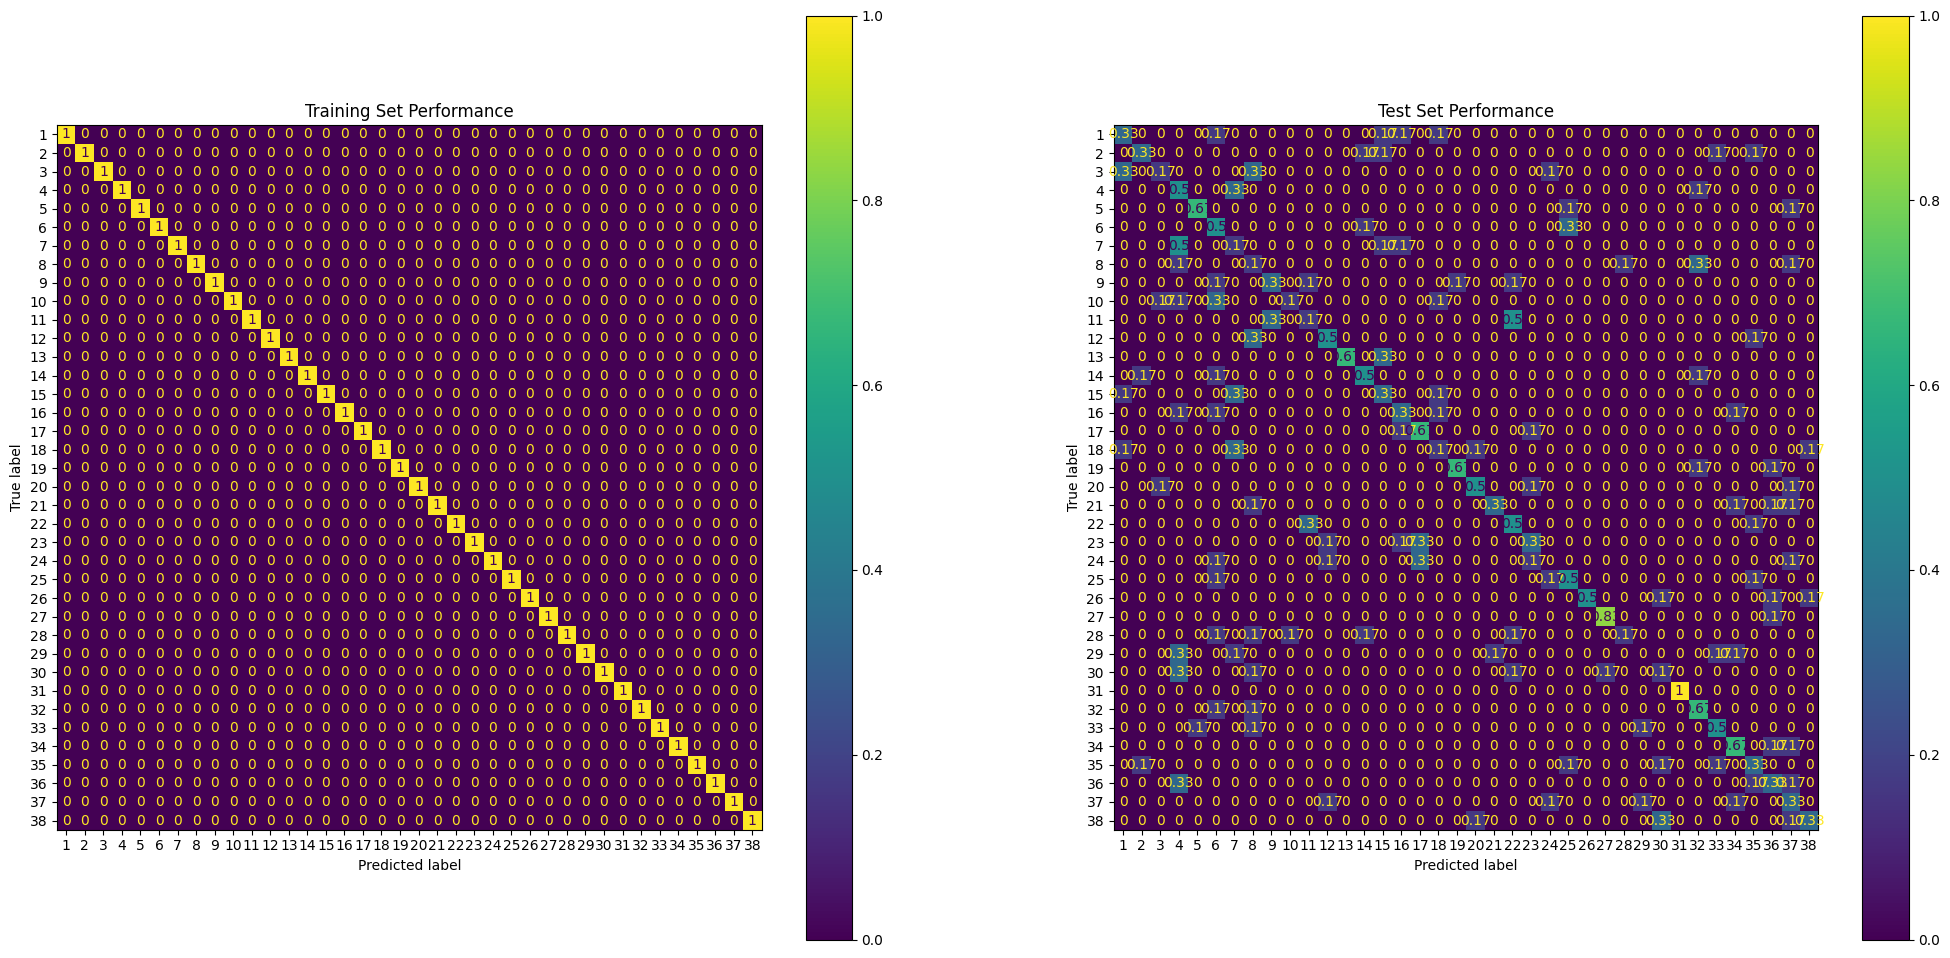

In [91]:
cknn_90 = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_90.fit(transformed_train_90, train_gnd)
evaluate_model(cknn_90, transformed_train_90, train_gnd, transformed_test_90, test_gnd)

Accuracy: 0.9083333333333333%


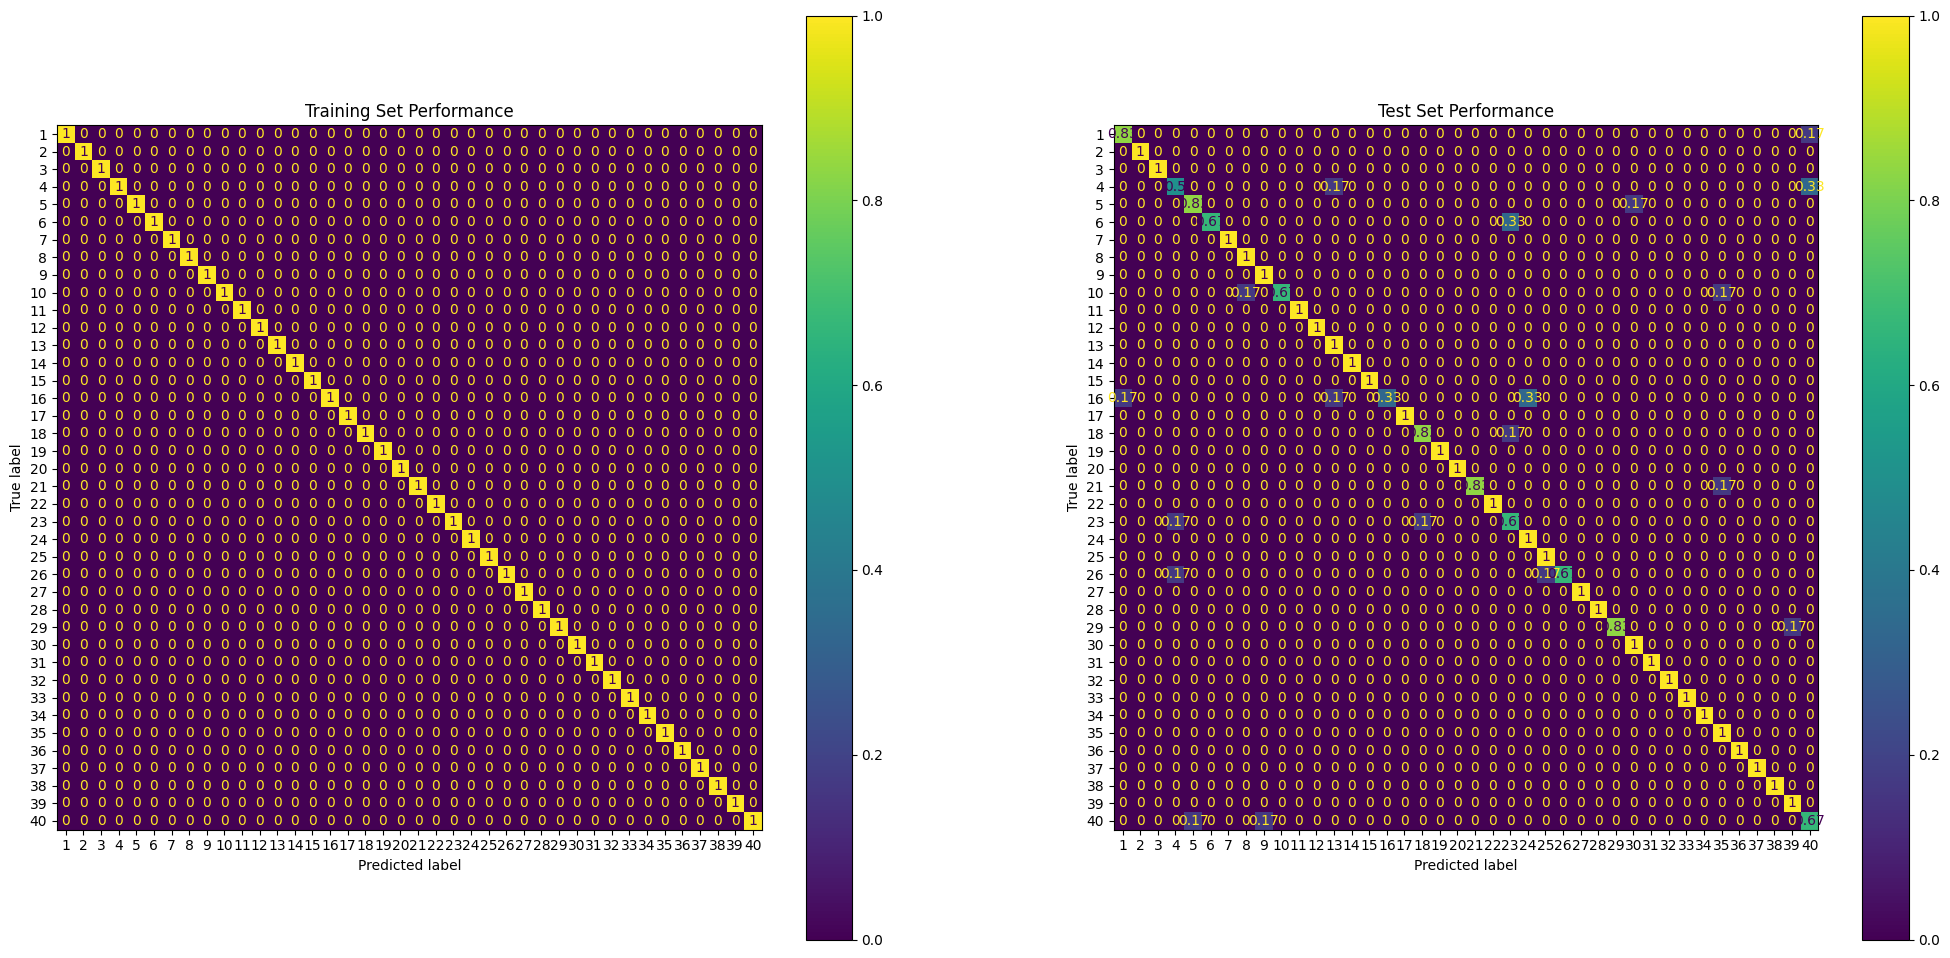

In [92]:
cknn_90_orl = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_90_orl.fit(transformed_train_90_orl, train_gnd_orl)
evaluate_model(cknn_90_orl, transformed_train_90_orl, train_gnd_orl, transformed_test_90_orl, test_gnd_orl)

#### Top 95%

Accuracy: 0.5701754385964912%


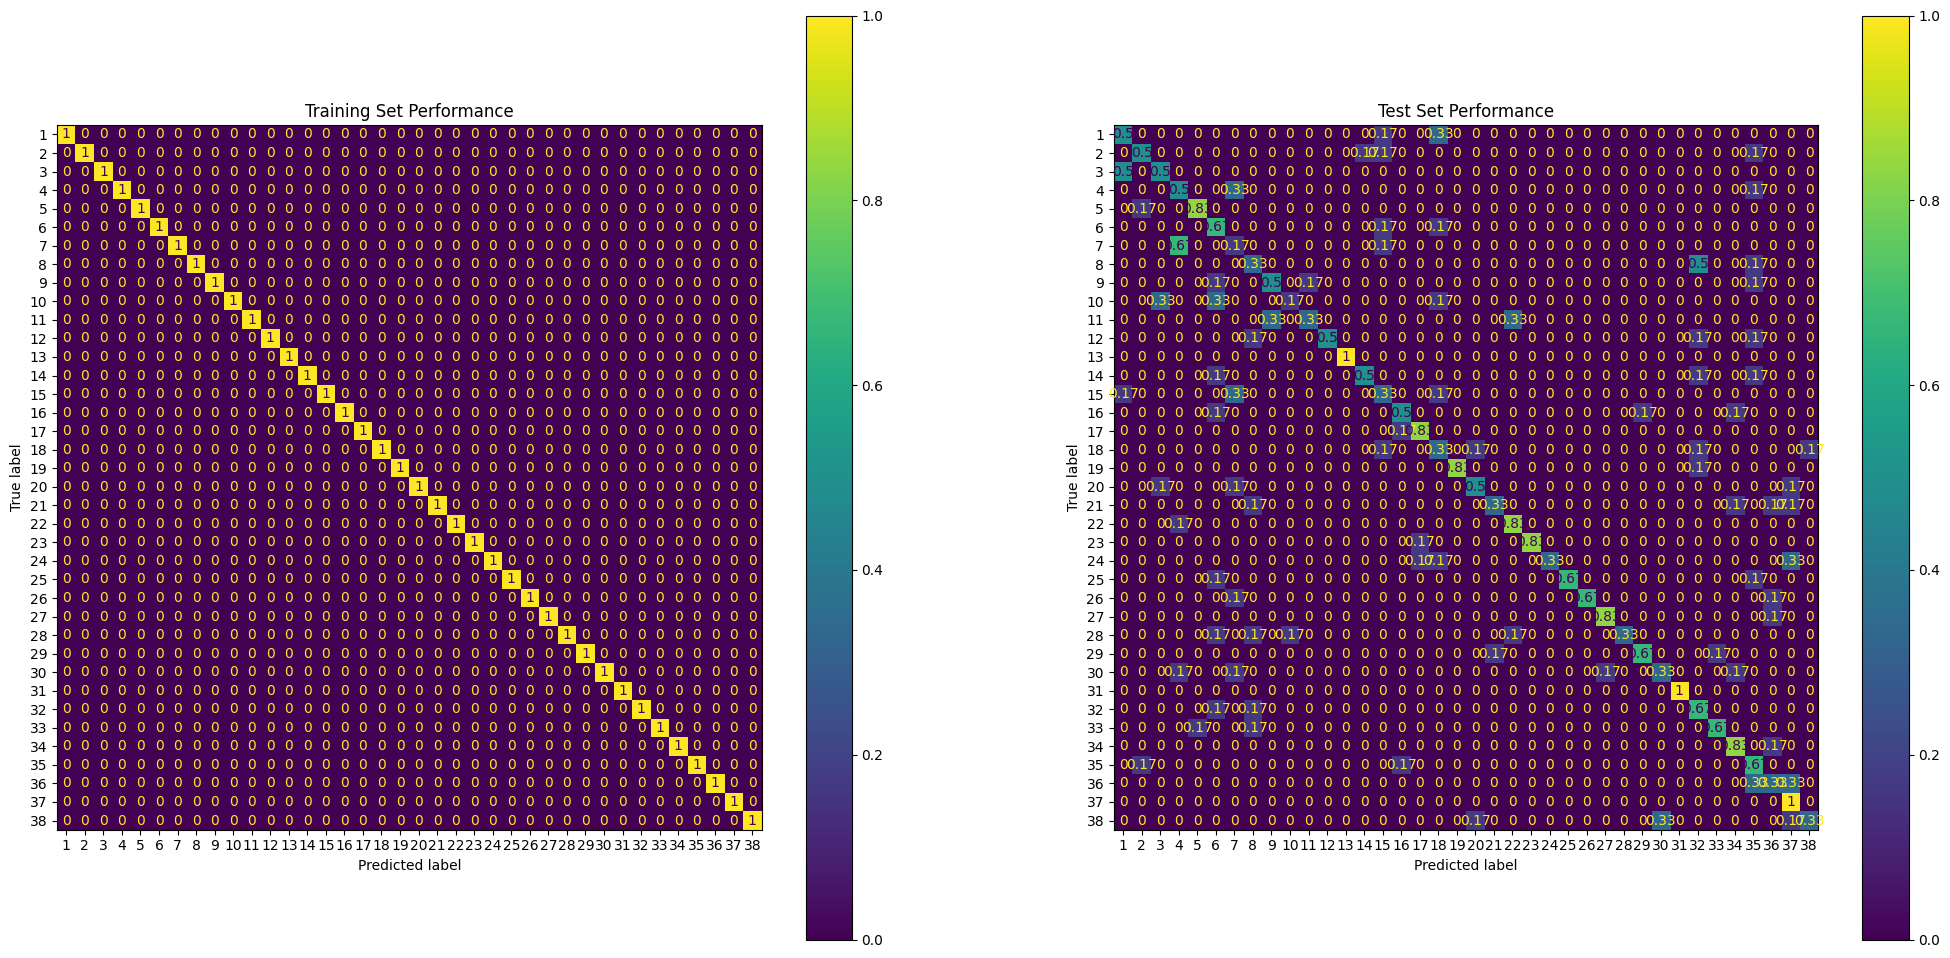

In [93]:
cknn_95 = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_95.fit(transformed_train_95, train_gnd)
evaluate_model(cknn_95, transformed_train_95, train_gnd, transformed_test_95, test_gnd)

In [94]:
cknn_95_orl = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_95_orl.fit(transformed_train_95_orl, train_gnd_orl)
evaluate_model(cknn_95_orl, transformed_train_95_orl, train_gnd_orl, transformed_test_95_orl, test_gnd_orl)

Accuracy: 0.9125%
Error in callback <function flush_figures at 0x1755796c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

#### Top 99%

Accuracy: 0.7149122807017544%


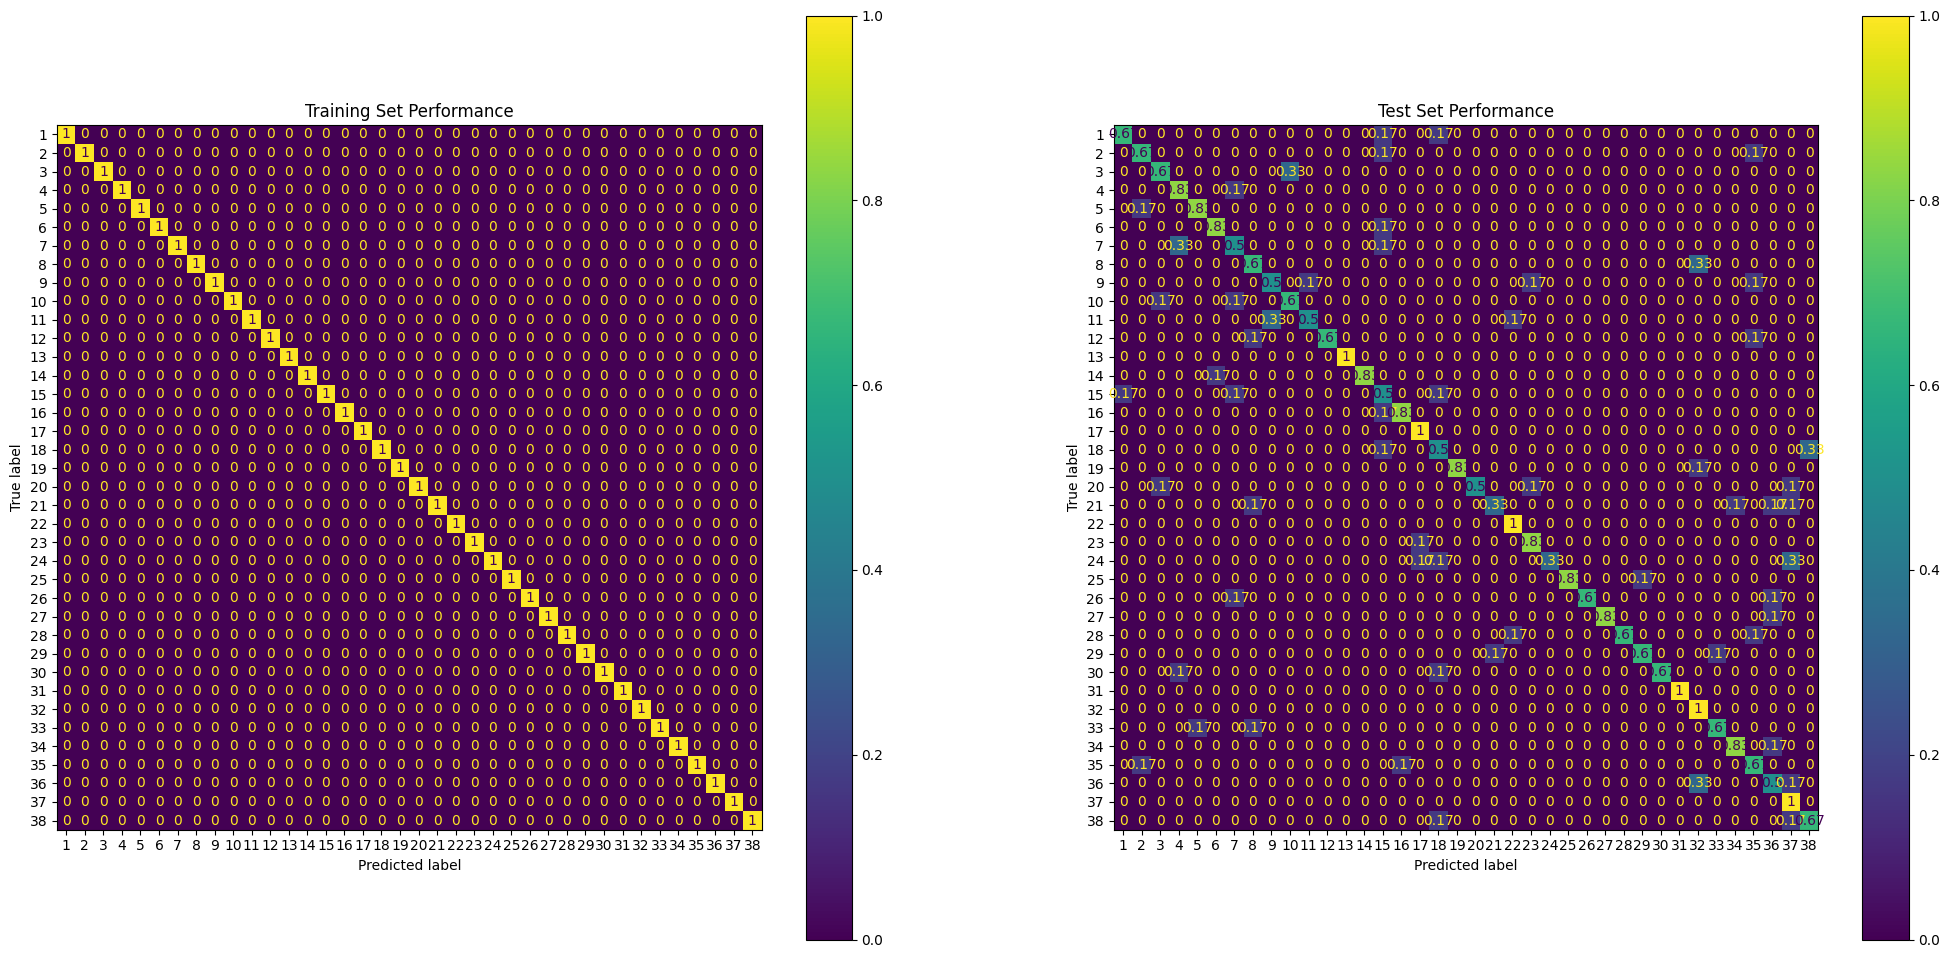

In [ ]:
cknn_99 = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_99.fit(transformed_train_99, train_gnd)
evaluate_model(cknn_99, transformed_train_99, train_gnd, transformed_test_99, test_gnd)

Accuracy: 0.9166666666666666%


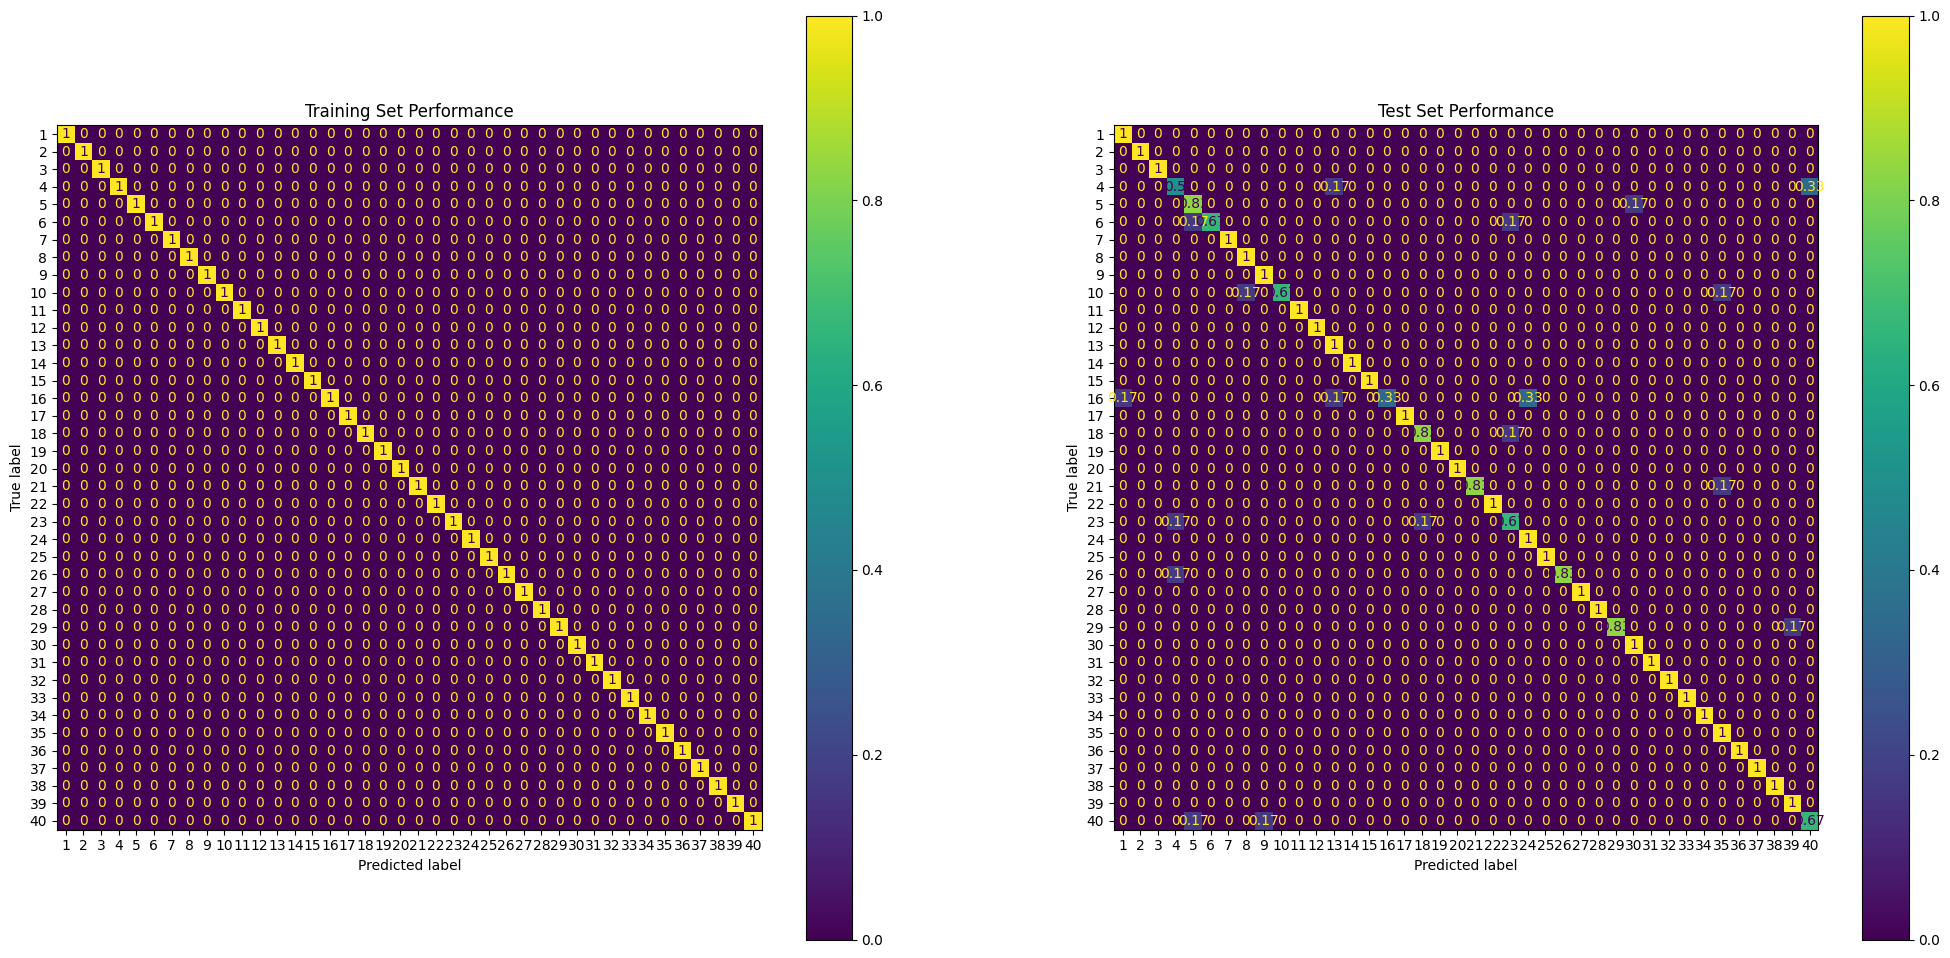

In [ ]:
cknn_99_orl = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_99_orl.fit(transformed_train_99_orl, train_gnd_orl)
evaluate_model(cknn_99_orl, transformed_train_99_orl, train_gnd_orl, transformed_test_99_orl, test_gnd_orl)

#### Pixels Model

Accuracy: 0.7368421052631579%


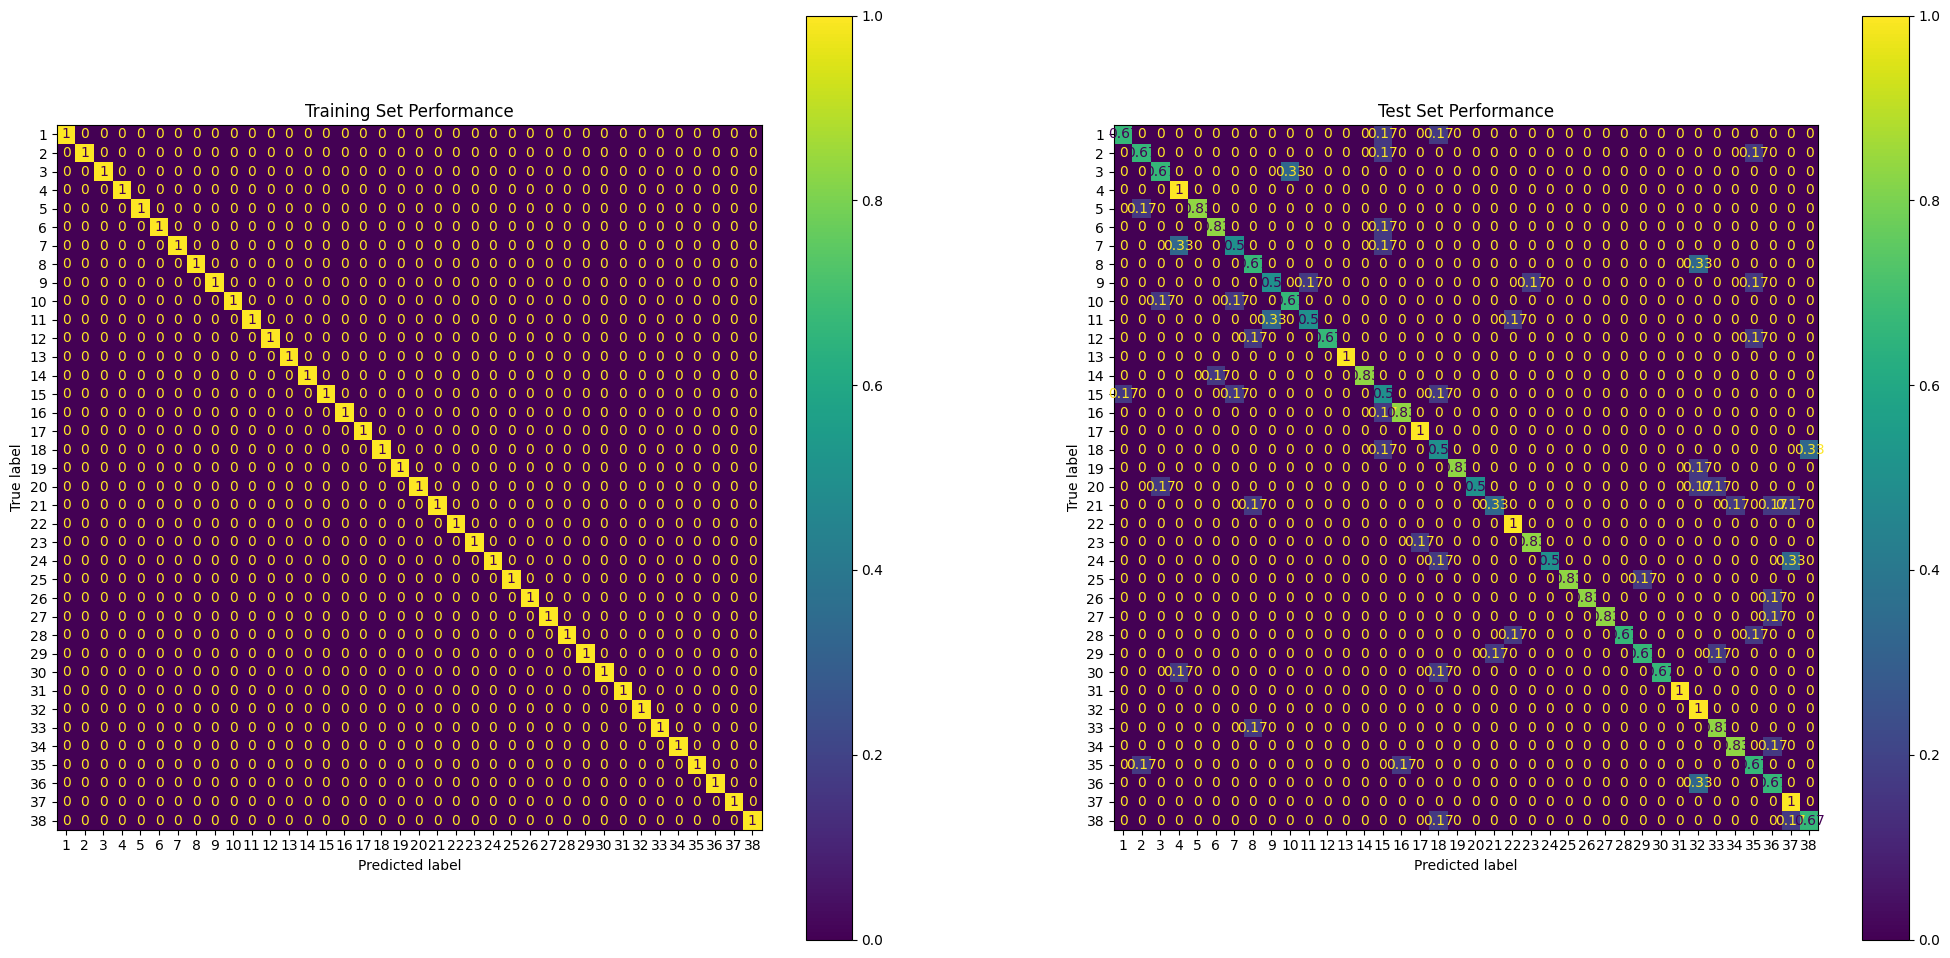

In [ ]:
cknn_pix = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_pix.fit(train_features, train_gnd)
evaluate_model(cknn_pix, train_features, train_gnd, test_features, test_gnd)

Accuracy: 0.9166666666666666%


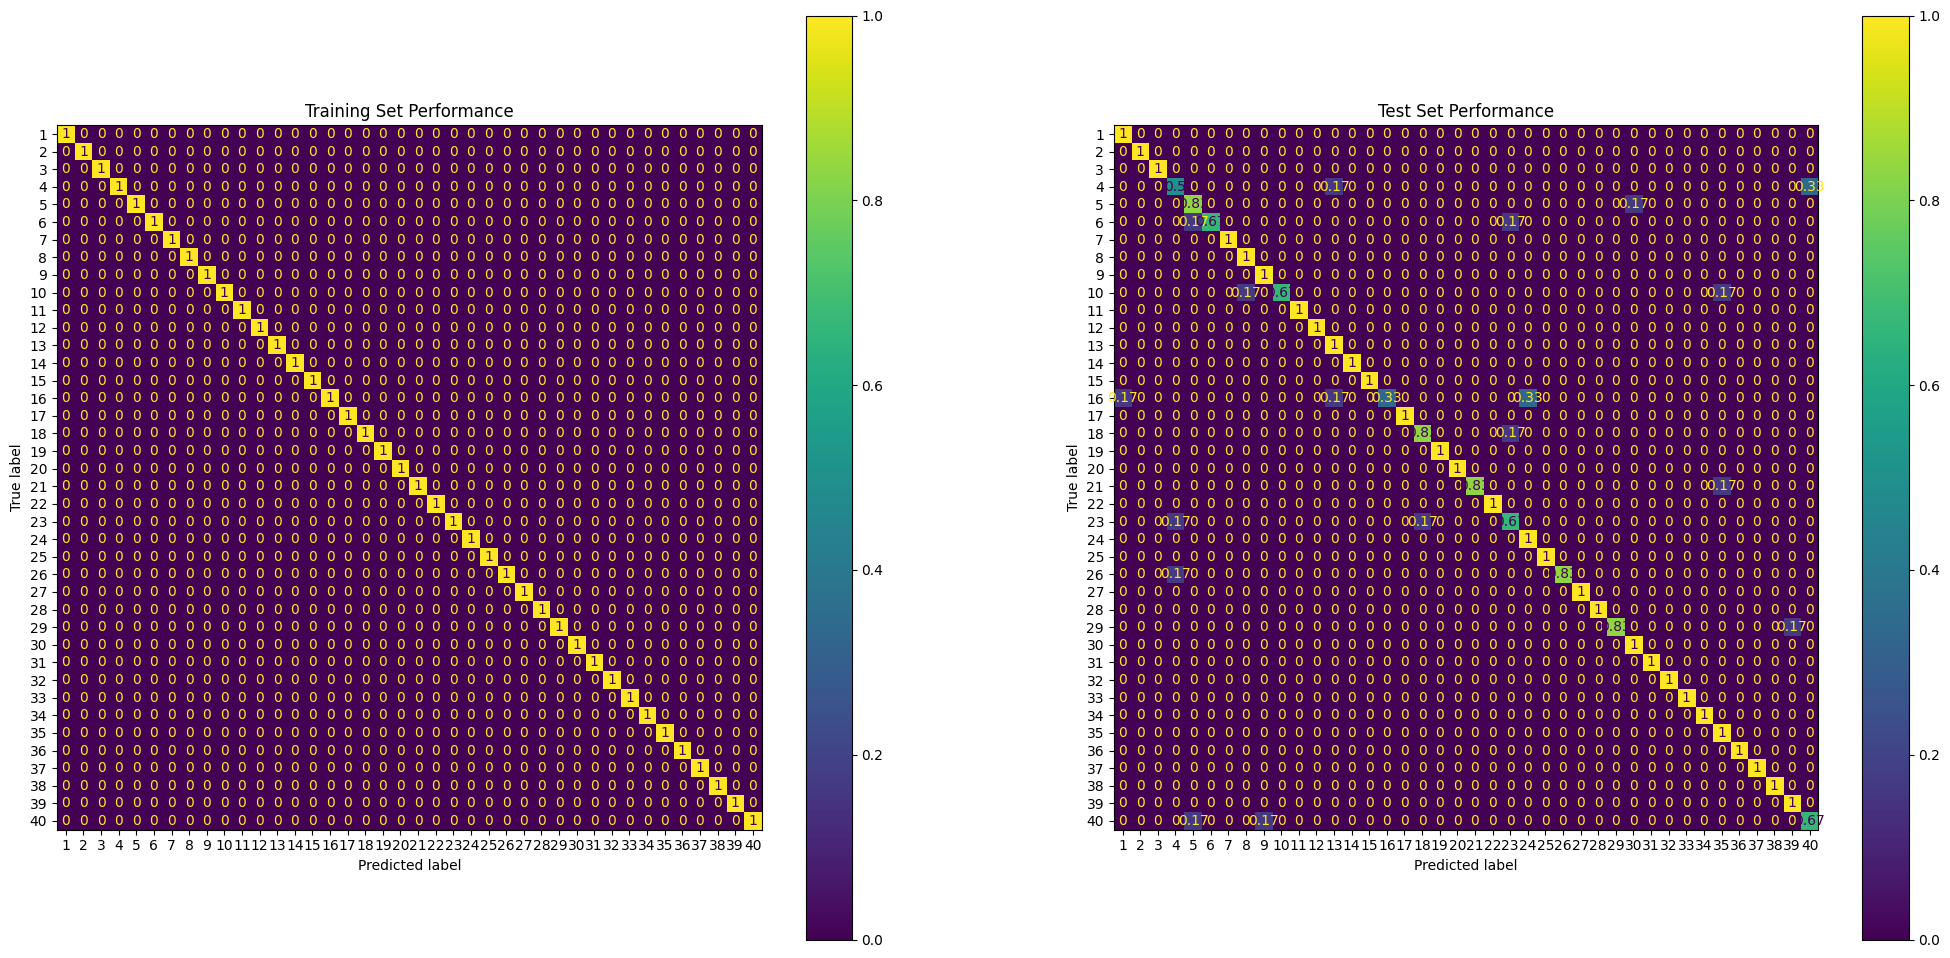

In [ ]:
cknn_pix_orl = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_pix_orl.fit(train_features_orl, train_gnd_orl)
evaluate_model(cknn_pix_orl, train_features_orl, train_gnd_orl, test_features_orl, test_gnd_orl)

### Visualising with T-SNE

In [ ]:
embeddings_90 = TSNE(random_state = 4).fit_transform(transformed_train_90)
embeddings_95 = TSNE(random_state = 4).fit_transform(transformed_train_95)
embeddings_all = TSNE(random_state = 4).fit_transform(transformed_data)
embeddings_pixels = TSNE(random_state = 4).fit_transform(train_features)

embeddings_90_orl = TSNE(random_state = 4).fit_transform(transformed_train_90_orl)
embeddings_95_orl = TSNE(random_state = 4).fit_transform(transformed_train_95_orl)
embeddings_all_orl = TSNE(random_state = 4).fit_transform(transformed_data_orl)
embeddings_pixels_orl = TSNE(random_state = 4).fit_transform(train_features_orl)

KeyboardInterrupt: 

Text(0.5, 1.0, 't-SNE with Pixels (ORL)')

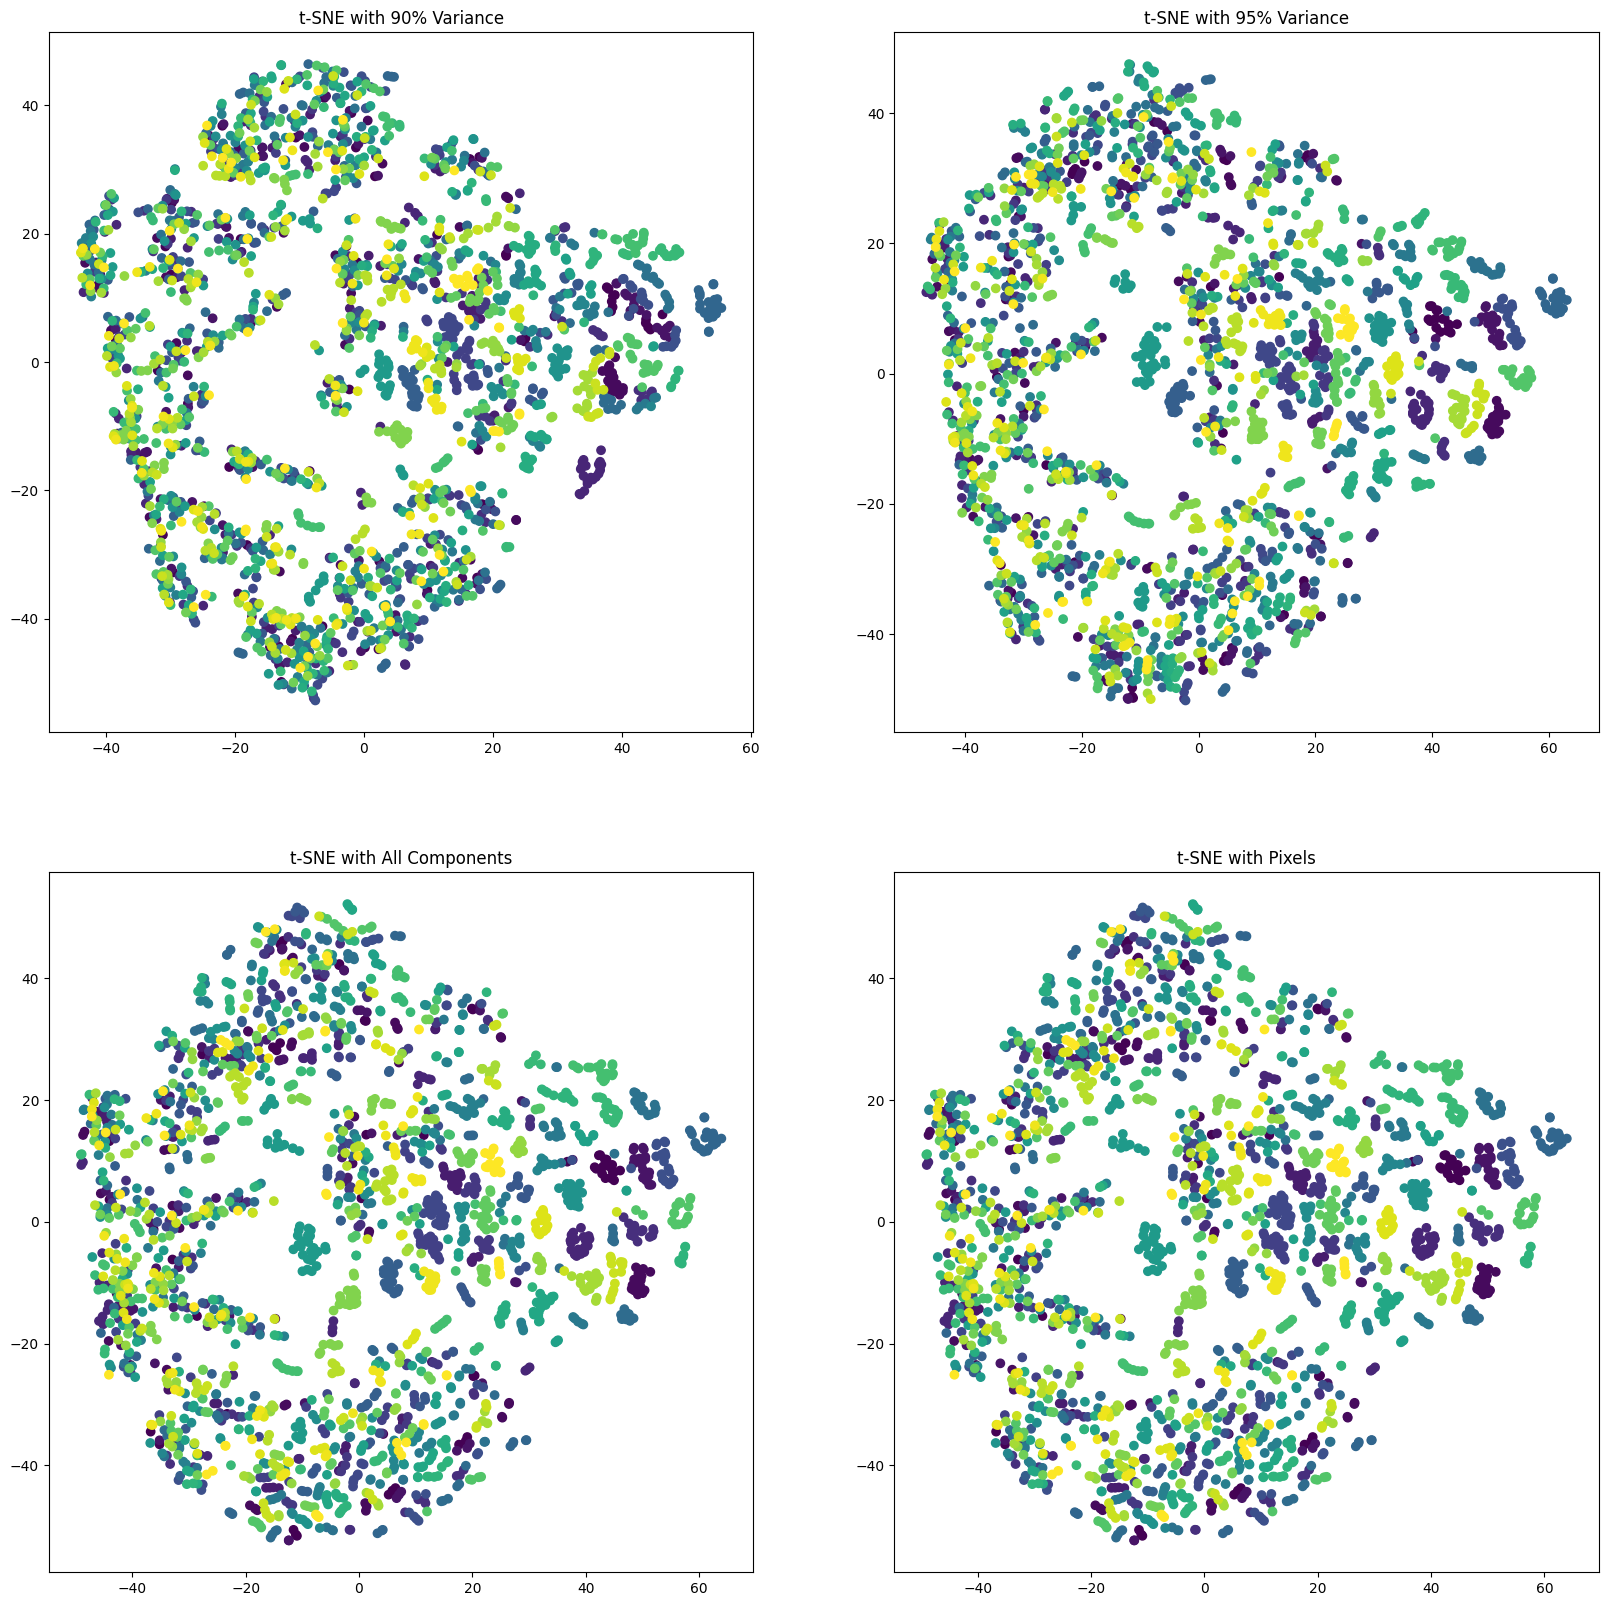

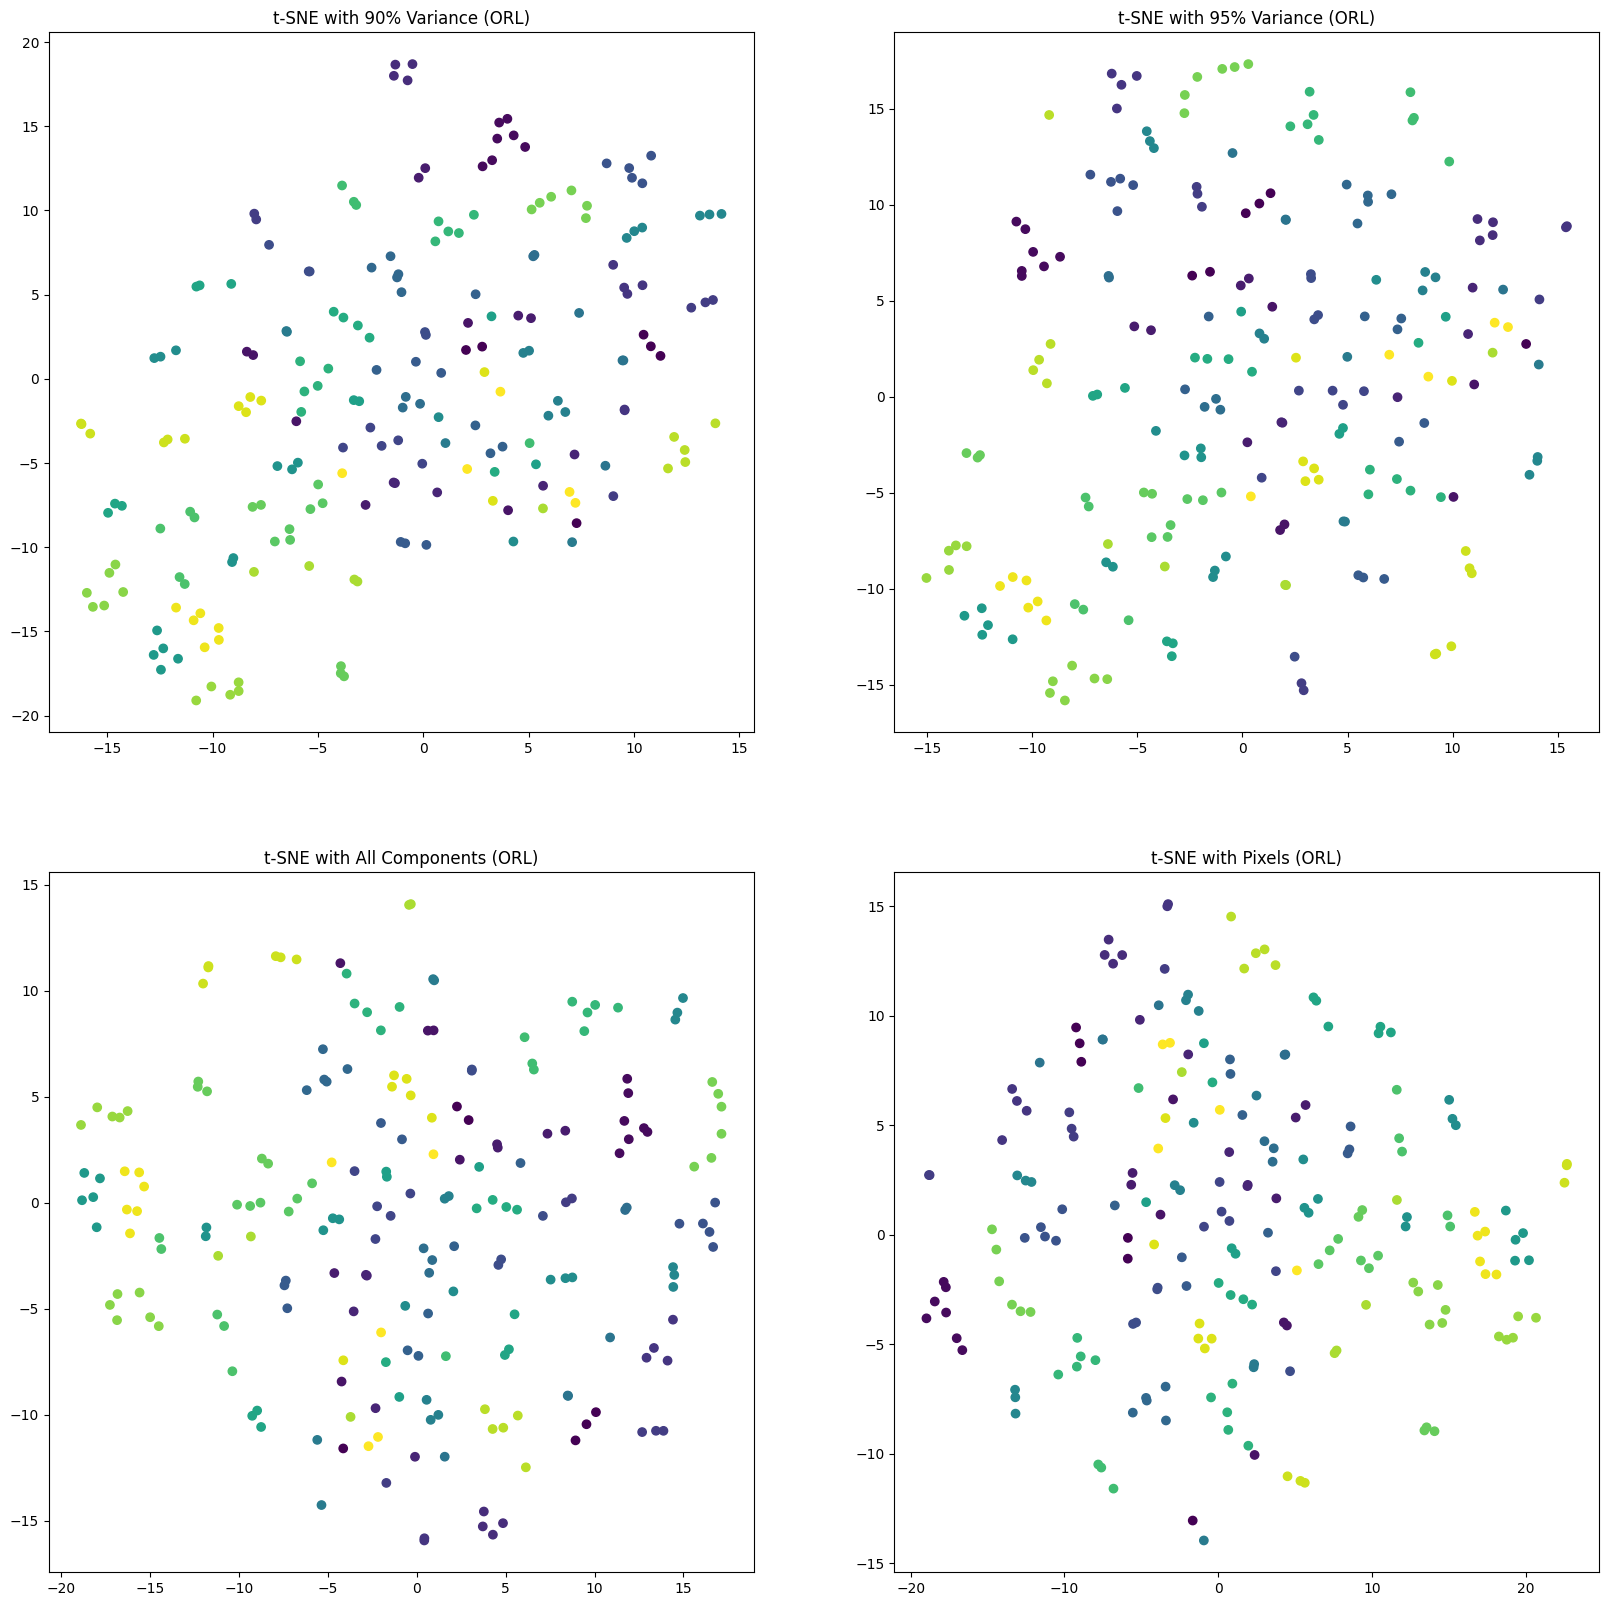

In [ ]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(2, 2, 1)
ax.scatter(embeddings_90[:, 0], embeddings_90[:, 1], c = train_gnd)
ax.set_title('t-SNE with 90% Variance')

ax = fig.add_subplot(2, 2, 2)
ax.scatter(embeddings_95[:, 0], embeddings_95[:, 1], c = train_gnd)
ax.set_title('t-SNE with 95% Variance')

ax = fig.add_subplot(2, 2, 3)
ax.scatter(embeddings_all[:, 0], embeddings_all[:, 1], c = train_gnd)
ax.set_title('t-SNE with All Components')

ax = fig.add_subplot(2, 2, 4)
ax.scatter(embeddings_pixels[:, 0], embeddings_pixels[:, 1], c = train_gnd)
ax.set_title('t-SNE with Pixels')


fig_orl = plt.figure(figsize=[20, 20])
ax_orl = fig_orl.add_subplot(2, 2, 1)
ax_orl.scatter(embeddings_90_orl[:, 0], embeddings_90_orl[:, 1], c = train_gnd_orl)
ax_orl.set_title('t-SNE with 90% Variance (ORL)')

ax_orl = fig_orl.add_subplot(2, 2, 2)
ax_orl.scatter(embeddings_95_orl[:, 0], embeddings_95_orl[:, 1], c = train_gnd_orl)
ax_orl.set_title('t-SNE with 95% Variance (ORL)')

ax_orl = fig_orl.add_subplot(2, 2, 3)
ax_orl.scatter(embeddings_all_orl[:, 0], embeddings_all_orl[:, 1], c = train_gnd_orl)
ax_orl.set_title('t-SNE with All Components (ORL)')

ax_orl = fig_orl.add_subplot(2, 2, 4)
ax_orl.scatter(embeddings_pixels_orl[:, 0], embeddings_pixels_orl[:, 1], c = train_gnd_orl)
ax_orl.set_title('t-SNE with Pixels (ORL)')

## Problem 2. FisherFaces

Linear Discriminant Analysis is designed to find a re-projection of the such that it maximises the distance between the classes, while ensuring that samples of the same classare tightly grouped. As such, it has been widely applied to biometrics. One such method is FisherFaces, which applies PCA, and then LDA to help group faces of the same subject. In brief, FisherFaces operates as follows:

1. Construct an image matrix, where each row is a vectorised version of an image (i.e. as was done for EigenFaces)
2. Project this matrix into an N - C (N is the number of samples, C is the number of unique classes) using PCA
3. Apply LDA to the subspace that results from the PCA transform, i.e.:
    a. Compute the between class scatter matrix in the projected space;
    b. Compute the within class scatter matrix in the projected space;
    c. Compute the eigenvalues and eigenvectors of the ratio of the scatter matrices

4. Learn a classifier (i.e. k-nearest neighbours) in the final LDA space.

New samples can now e mapped to the FisherFace space by applying the PCA projection followed by the LDA projection.

Using this classifier:

1. Compare the performance of LDA and PCA using the test set of the YaleB dataset.
2. Compare the performance of LDA and PCA using two additional datasets, the Yale_32x32.mat and ORL_32x32.mat. As per Question 1, do not retrain the PCA or LDA subspace using this data
3. Compare the performance of EigenFaces as the number of retained PCA components changes, to FisherFaces when equivalent changes are made to the number of retained components in the LDA space (note, do not reduce the number of components in the initial PCA projection for FisherFaces).

More information on FisherFaces can be found in the original paper, or online in posts such as this one: https://www.bytefish.de/blog/fisherfaces/.

Accuracy: 0.6973684210526315%


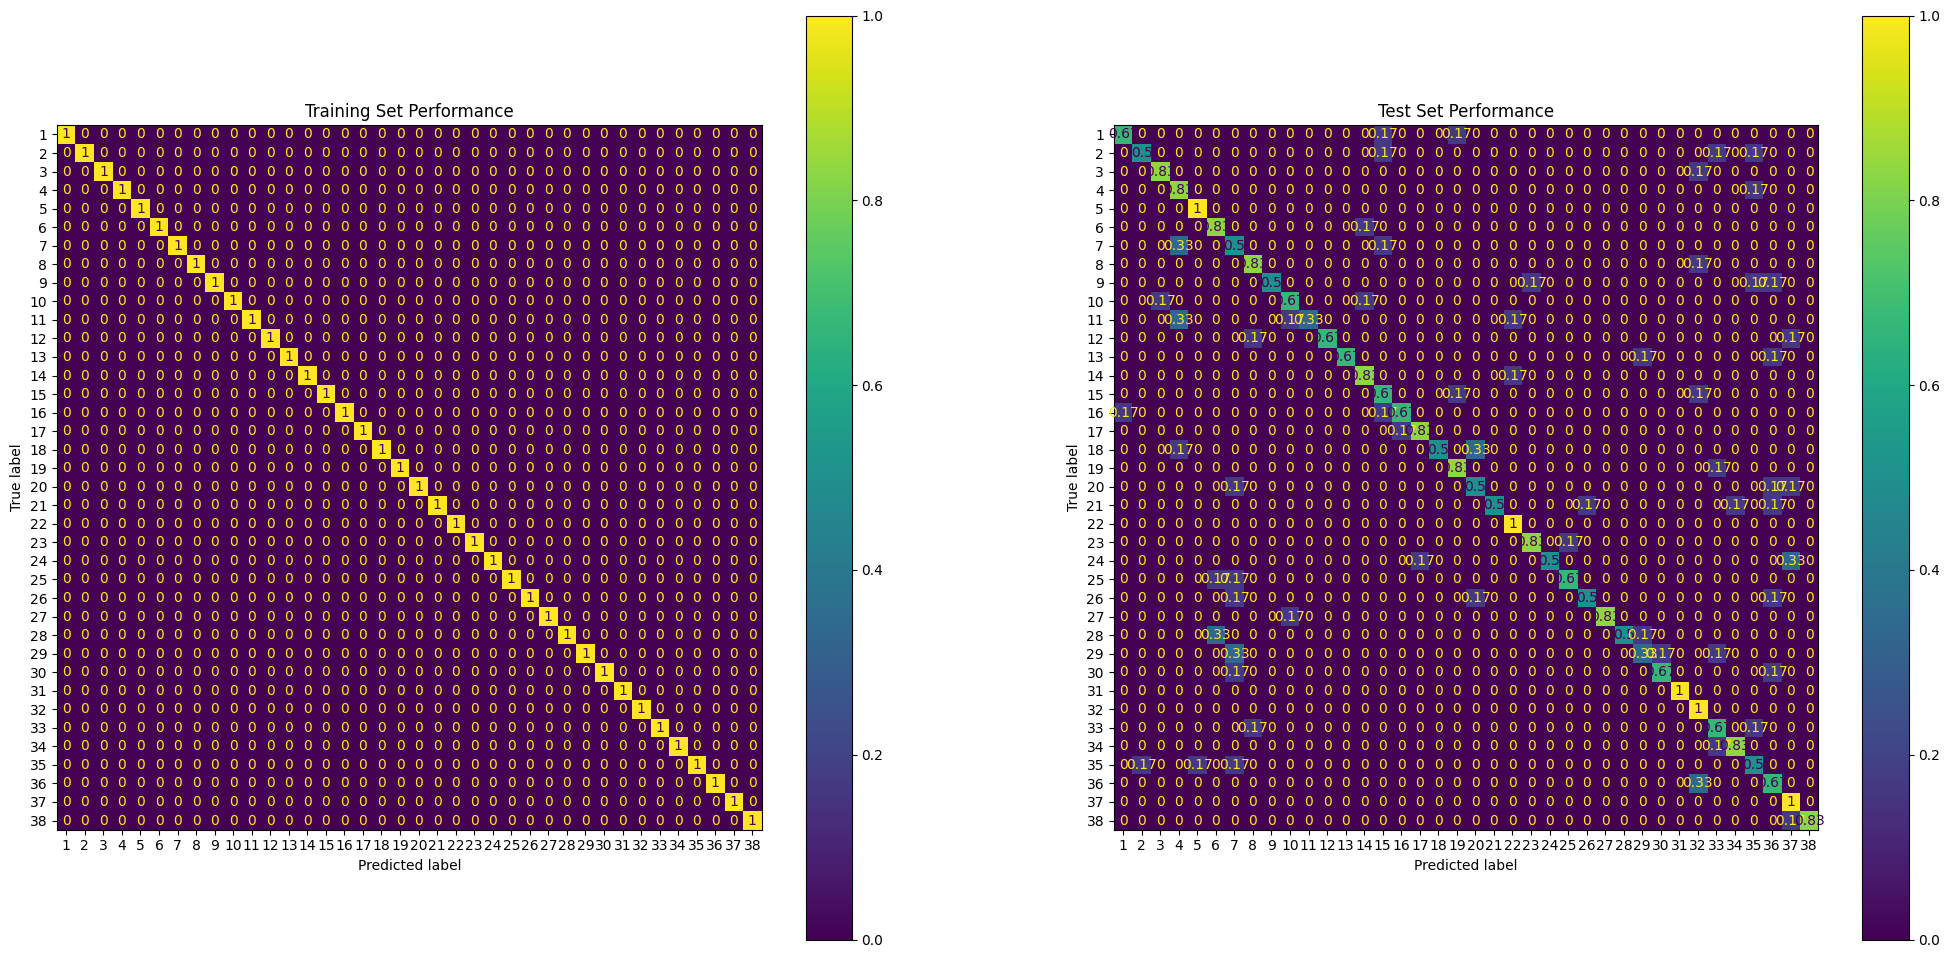

In [ ]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(transformed_data, train_gnd)
lda_train_features = lda.transform(train_features)
lda_test_features = lda.transform(test_features)

cknn_lda = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_lda.fit(lda_train_features, train_gnd)
evaluate_model(cknn_lda, lda_train_features, train_gnd, lda_test_features, test_gnd)


It appears that the LDA performs slightly worse than the PCA.

Looking at how it compares on the ORL dataset.

Accuracy: 0.9708333333333333%


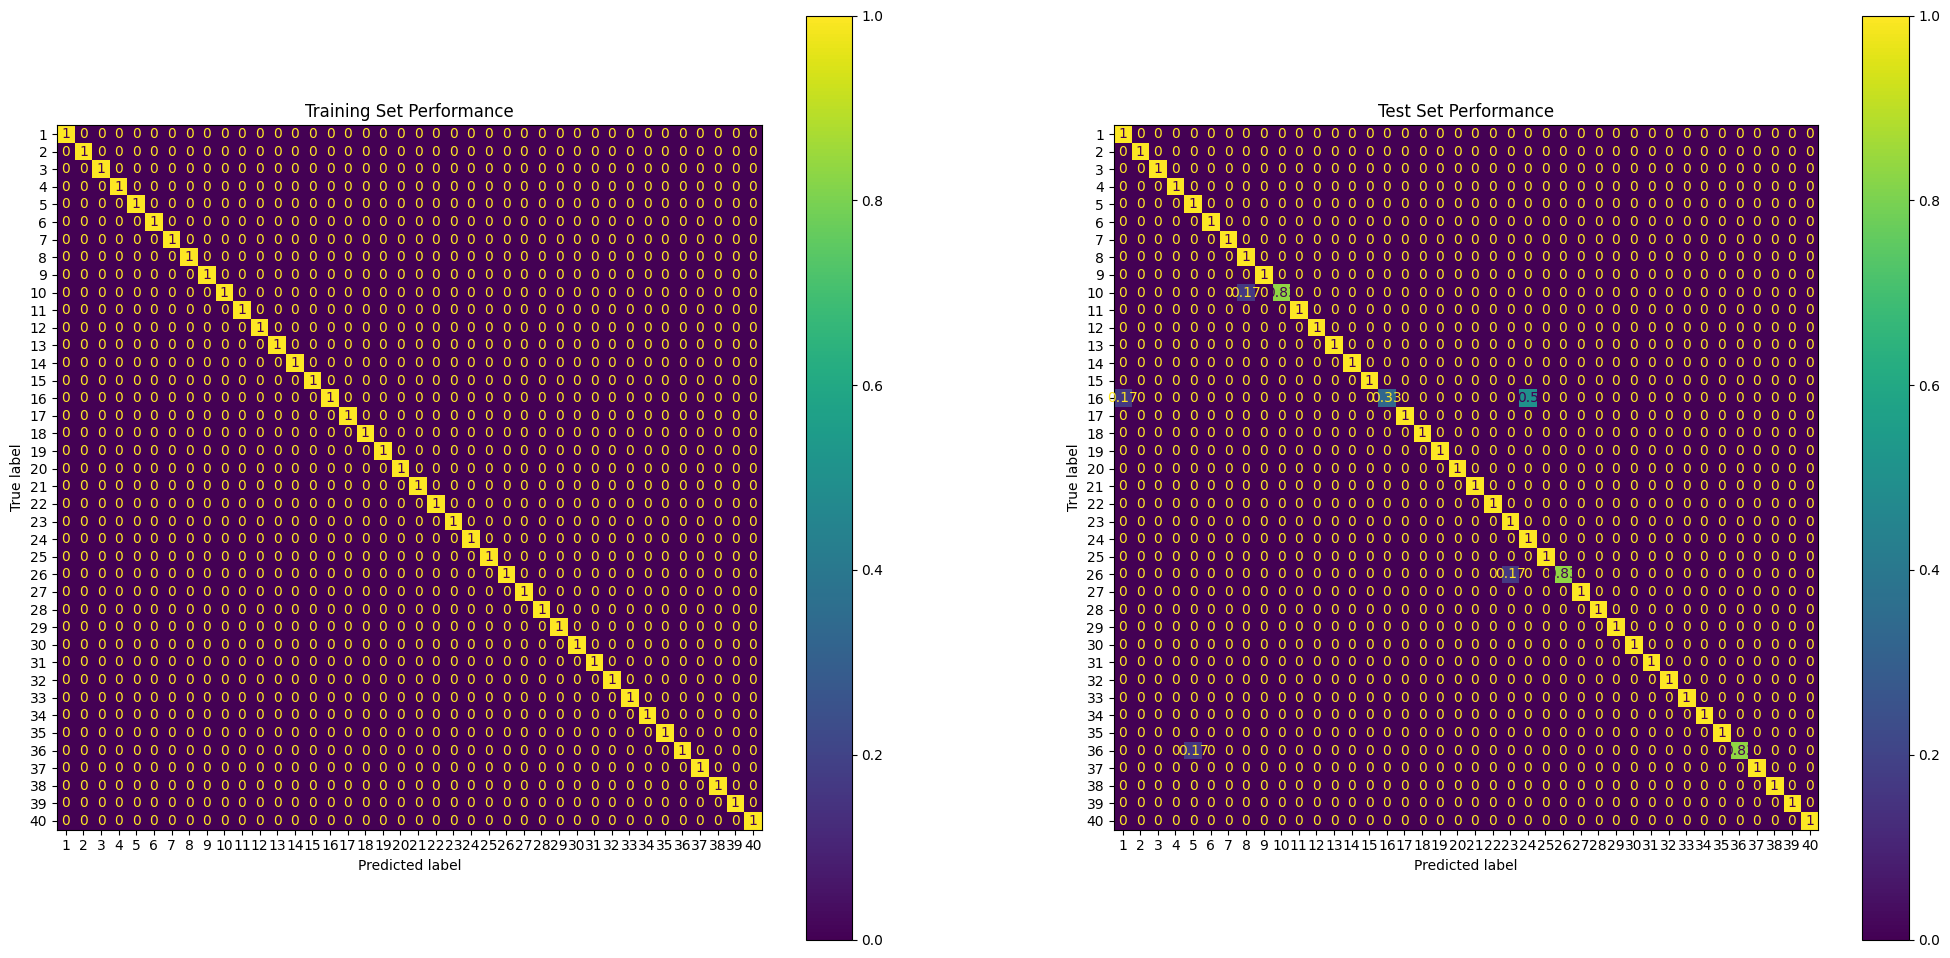

In [ ]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(train_features_orl, train_gnd_orl)

lda_train_features_orl = lda.transform(train_features_orl)
lda_test_features_orl = lda.transform(test_features_orl)

cknn_lda_orl = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
cknn_lda_orl.fit(lda_train_features_orl, train_gnd_orl)
evaluate_model(cknn_lda_orl, lda_train_features_orl, train_gnd_orl, lda_test_features_orl, test_gnd_orl)

It appears performance is significantly better when applying LDA to the ORL dataset